# Data Homework: Chapter 13 (Mankiw)

Name:<u>Enter your full name here

Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=pUBj) using pandas_datareader.

>Real Imports: IMPGSC1
>
>Real Exports: EXPGSC1
>
>Real GDP: GDPC1
>
>Real Trade Weighted Dollar: TWEXBPA

In [8]:
import datetime
from datlib.plots import *
from datlib.FRED import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})

#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Real Imports": "IMPGSC1",
               "Real Exports": "EXPGSC1",
               "Real GDP": "GDPC1",
               "Real Trade Weighted Dollar": "TWEXBPA"}
# Select start and end dates
start = datetime.datetime(1947, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")

1.	Generate logged values for each variable.

In [9]:
keys = list(data.keys())
for key, val in data.items():
    data["Log " + key] = np.log(val)
data["Net Real Exports"] = data["Real Exports"].sub(data["Real Imports"])
data["Net Real Exports (Log)"] = data["Log Real Exports"].sub(data["Log Real Imports"])

In [10]:
# dropna drops months without values for the trade weighted dollar
data.dropna()

,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (Log)
DATE,,,,,,,,,,
1973-03-31,355.566,248.867,5646.286,103.554200,5.873711,5.516919,8.638753,4.640095,-106.699,-0.356792
1973-06-30,345.318,260.856,5707.755,99.040800,5.844466,5.563969,8.649581,4.595532,-84.462,-0.280497
1973-09-30,335.778,261.735,5677.738,95.825633,5.816450,5.567333,8.644308,4.562530,-74.043,-0.249118
1973-12-31,338.284,274.610,5731.632,97.466267,5.823886,5.615352,8.653756,4.579506,-63.674,-0.208534
1974-03-31,326.810,278.171,5682.353,97.567700,5.789379,5.628236,8.645121,4.580546,-48.639,-0.161143
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,3472.058,2545.573,18721.281,101.633167,8.152503,7.842111,9.837416,4.621370,-926.485,-0.310392
2019-03-31,3472.010,2565.316,18833.195,100.525467,8.152489,7.849837,9.843376,4.610411,-906.694,-0.302652
2019-06-30,3486.624,2551.325,18982.528,101.161100,8.156689,7.844368,9.851274,4.616714,-935.299,-0.312321


2.	Plot the logged values of each variable on a single graph

3.	Generate differenced logged values for each variable

In [14]:
for key in keys:
    print("Log "+ key)
    log_key = "Log " + key
    data[log_key + " Diff"] = data[log_key].pct_change(4)

data

Log Real Imports
Log Real Exports
Log Real GDP
Log Real Trade Weighted Dollar


,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (Log),Log Real Imports Diff,Log Real Exports Diff,Log Real GDP Diff,Log Real Trade Weighted Dollar Diff
DATE,,,,,,,,,,,,,,
1947-03-31,60.396,97.630,2034.450,NaN,4.100923,4.581185,7.617981,NaN,37.234,0.480262,NaN,NaN,NaN,NaN
1947-06-30,61.559,96.399,2029.024,NaN,4.119996,4.568496,7.615310,NaN,34.840,0.448500,NaN,NaN,NaN,NaN
1947-09-30,54.594,91.506,2024.834,NaN,3.999924,4.516405,7.613243,NaN,36.912,0.516481,NaN,NaN,NaN,NaN
1947-12-31,57.538,81.139,2056.508,NaN,4.052446,4.396164,7.628765,NaN,23.601,0.343718,NaN,NaN,NaN,NaN
1948-03-31,64.883,77.437,2087.442,NaN,4.172586,4.349465,7.643695,NaN,12.554,0.176879,0.017475,-0.050581,0.003375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3411.843,2279.025,18767.778,NaN,8.135008,7.731503,9.839897,NaN,-1132.818,-0.403505,0.000395,-0.014486,-0.002321,0.0
2021-03-31,3488.445,2262.347,19055.655,NaN,8.157211,7.724158,9.855119,NaN,-1226.098,-0.433053,0.007462,-0.009799,0.000554,0.0
2021-06-30,3548.699,2304.164,19368.310,NaN,8.174336,7.742473,9.871394,NaN,-1244.535,-0.431863,0.033737,0.022518,0.011823,0.0


4.	Plot the differenced logged values for each variable on a single graph.

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


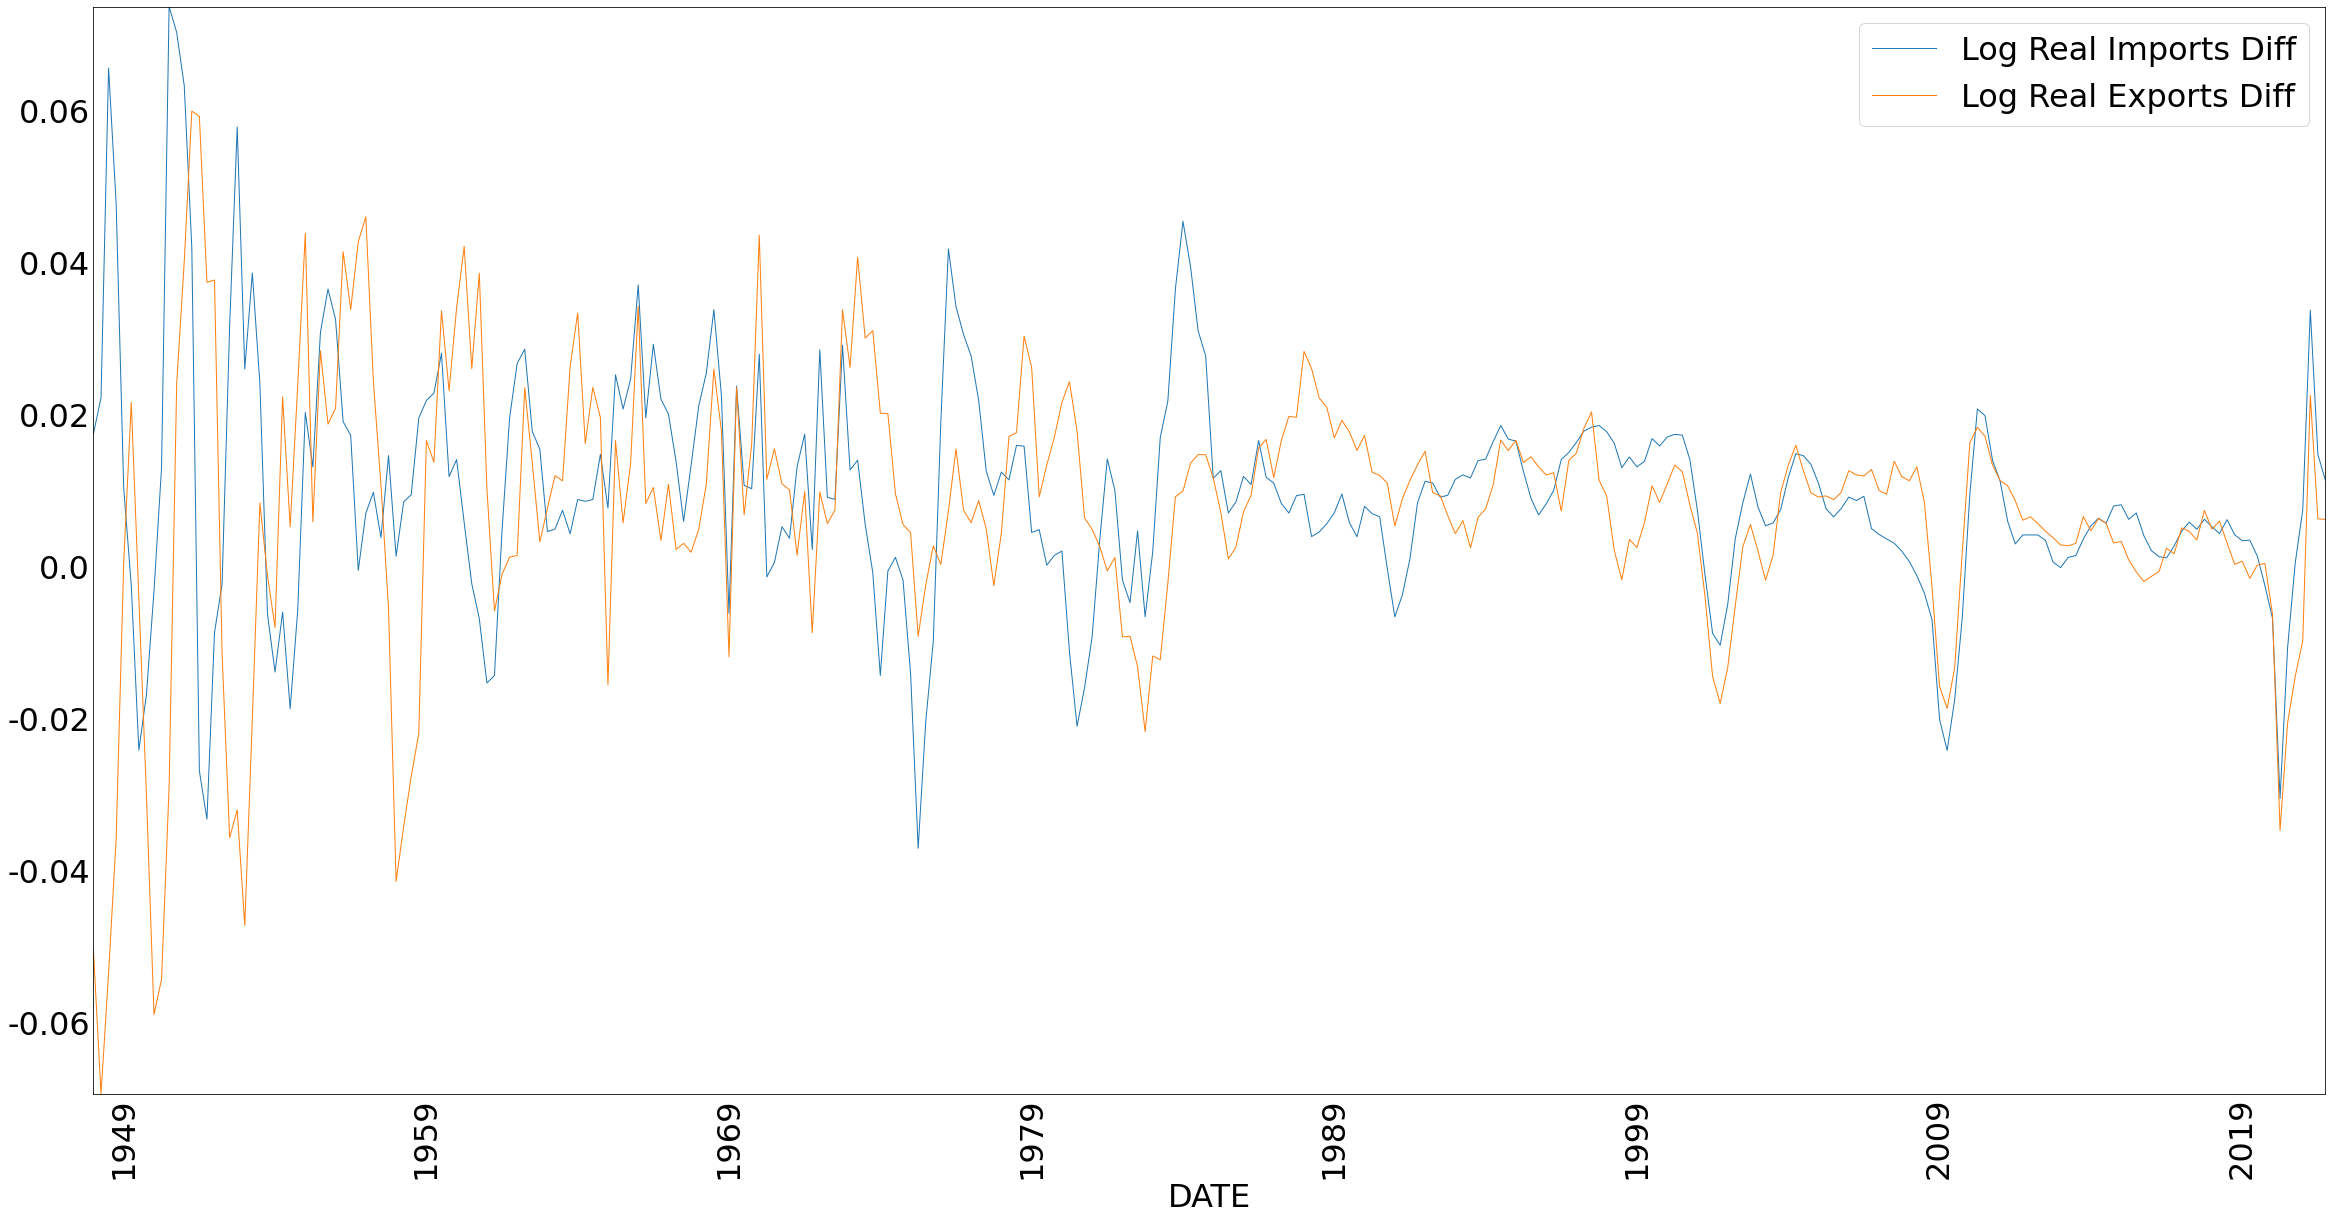

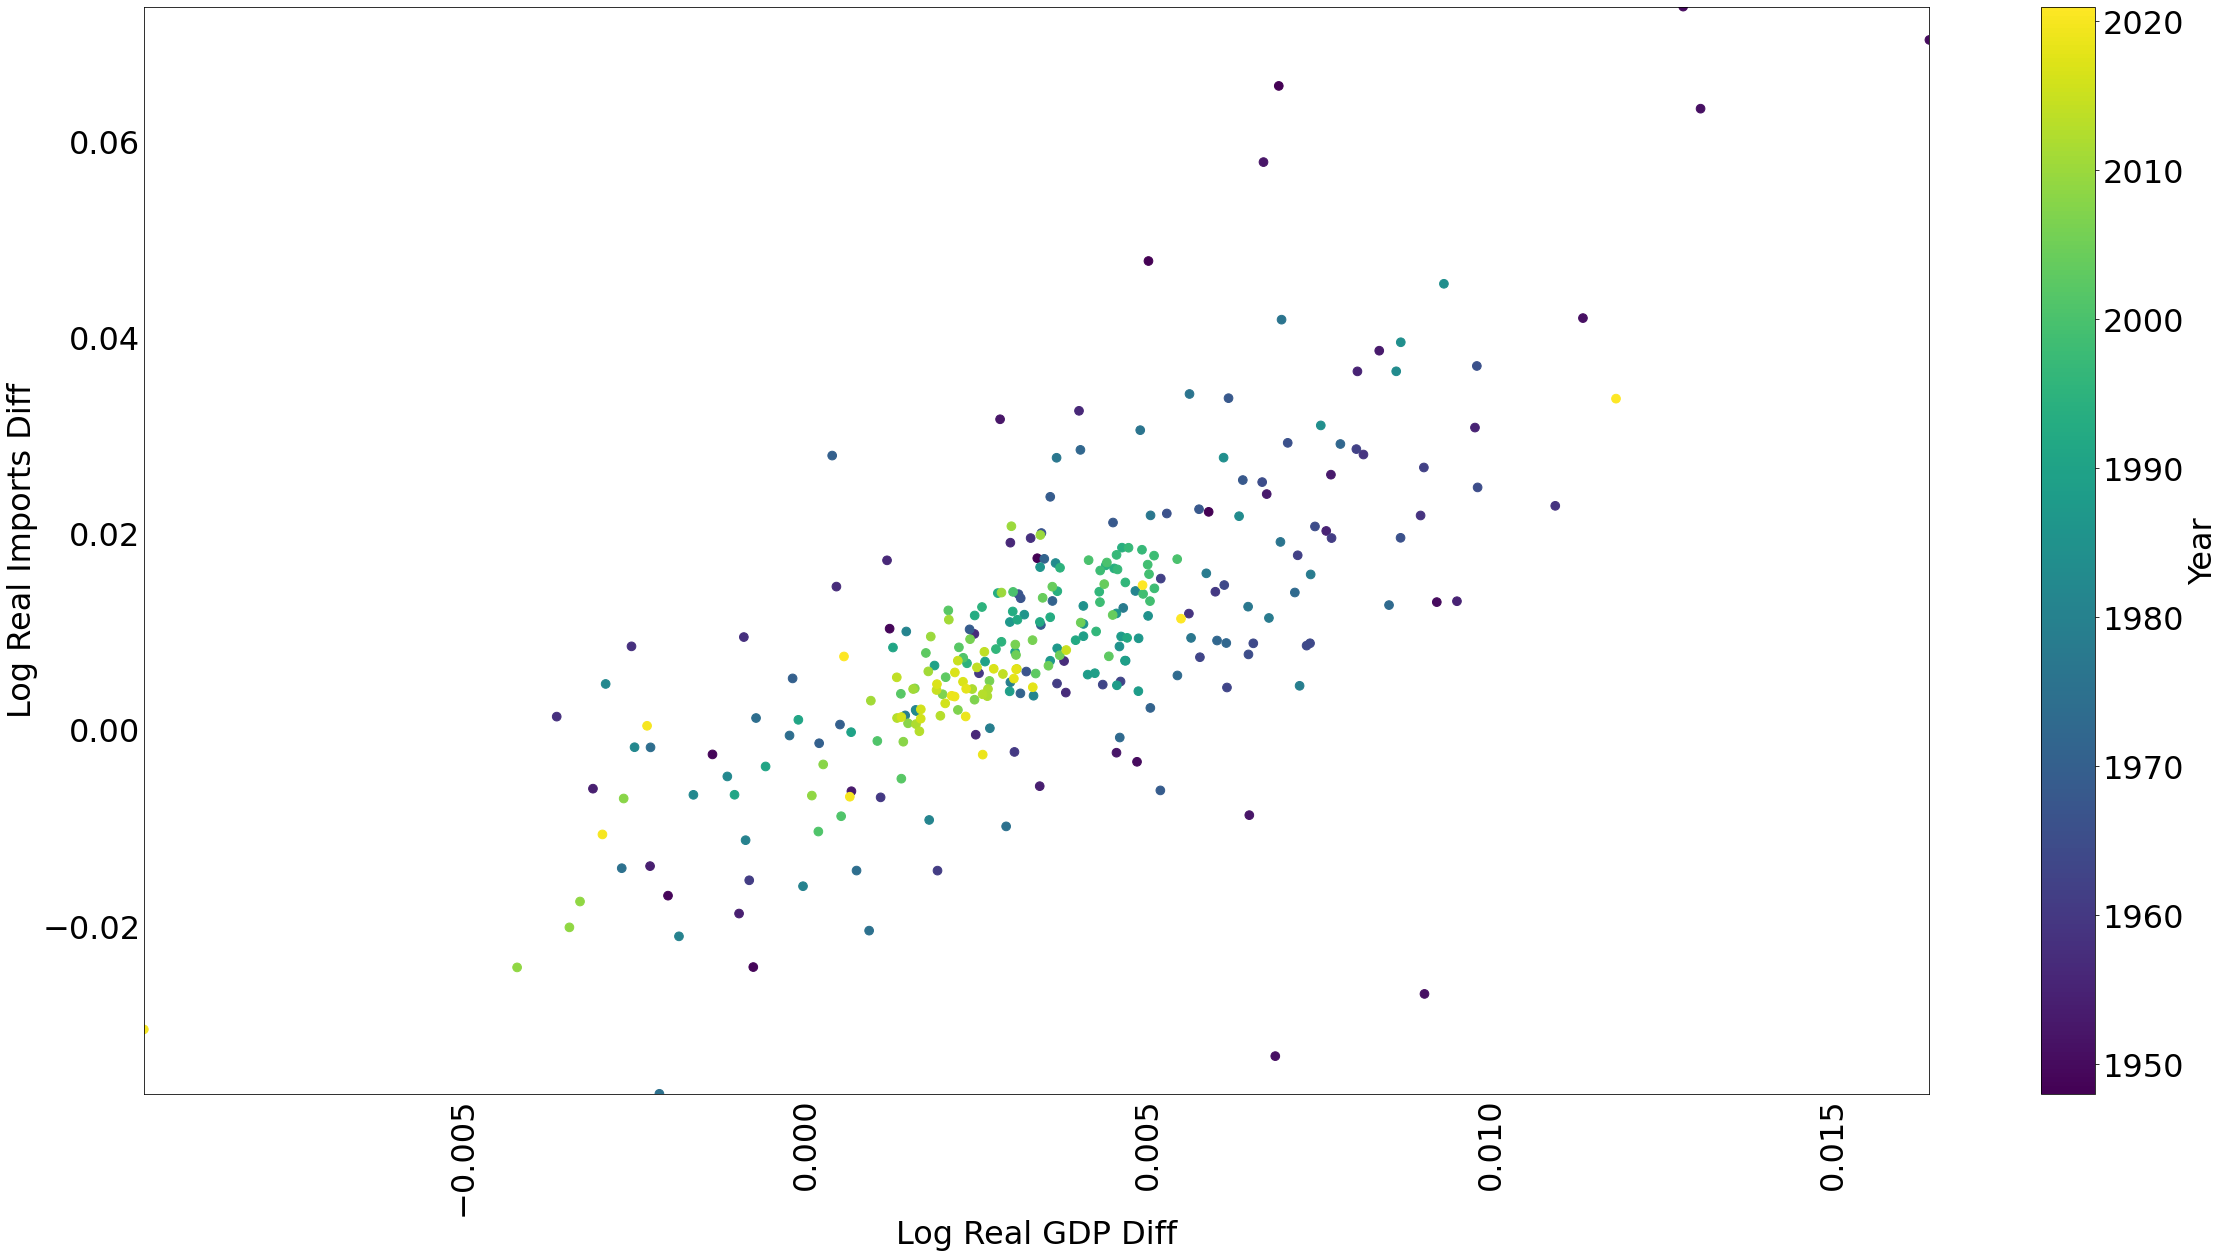

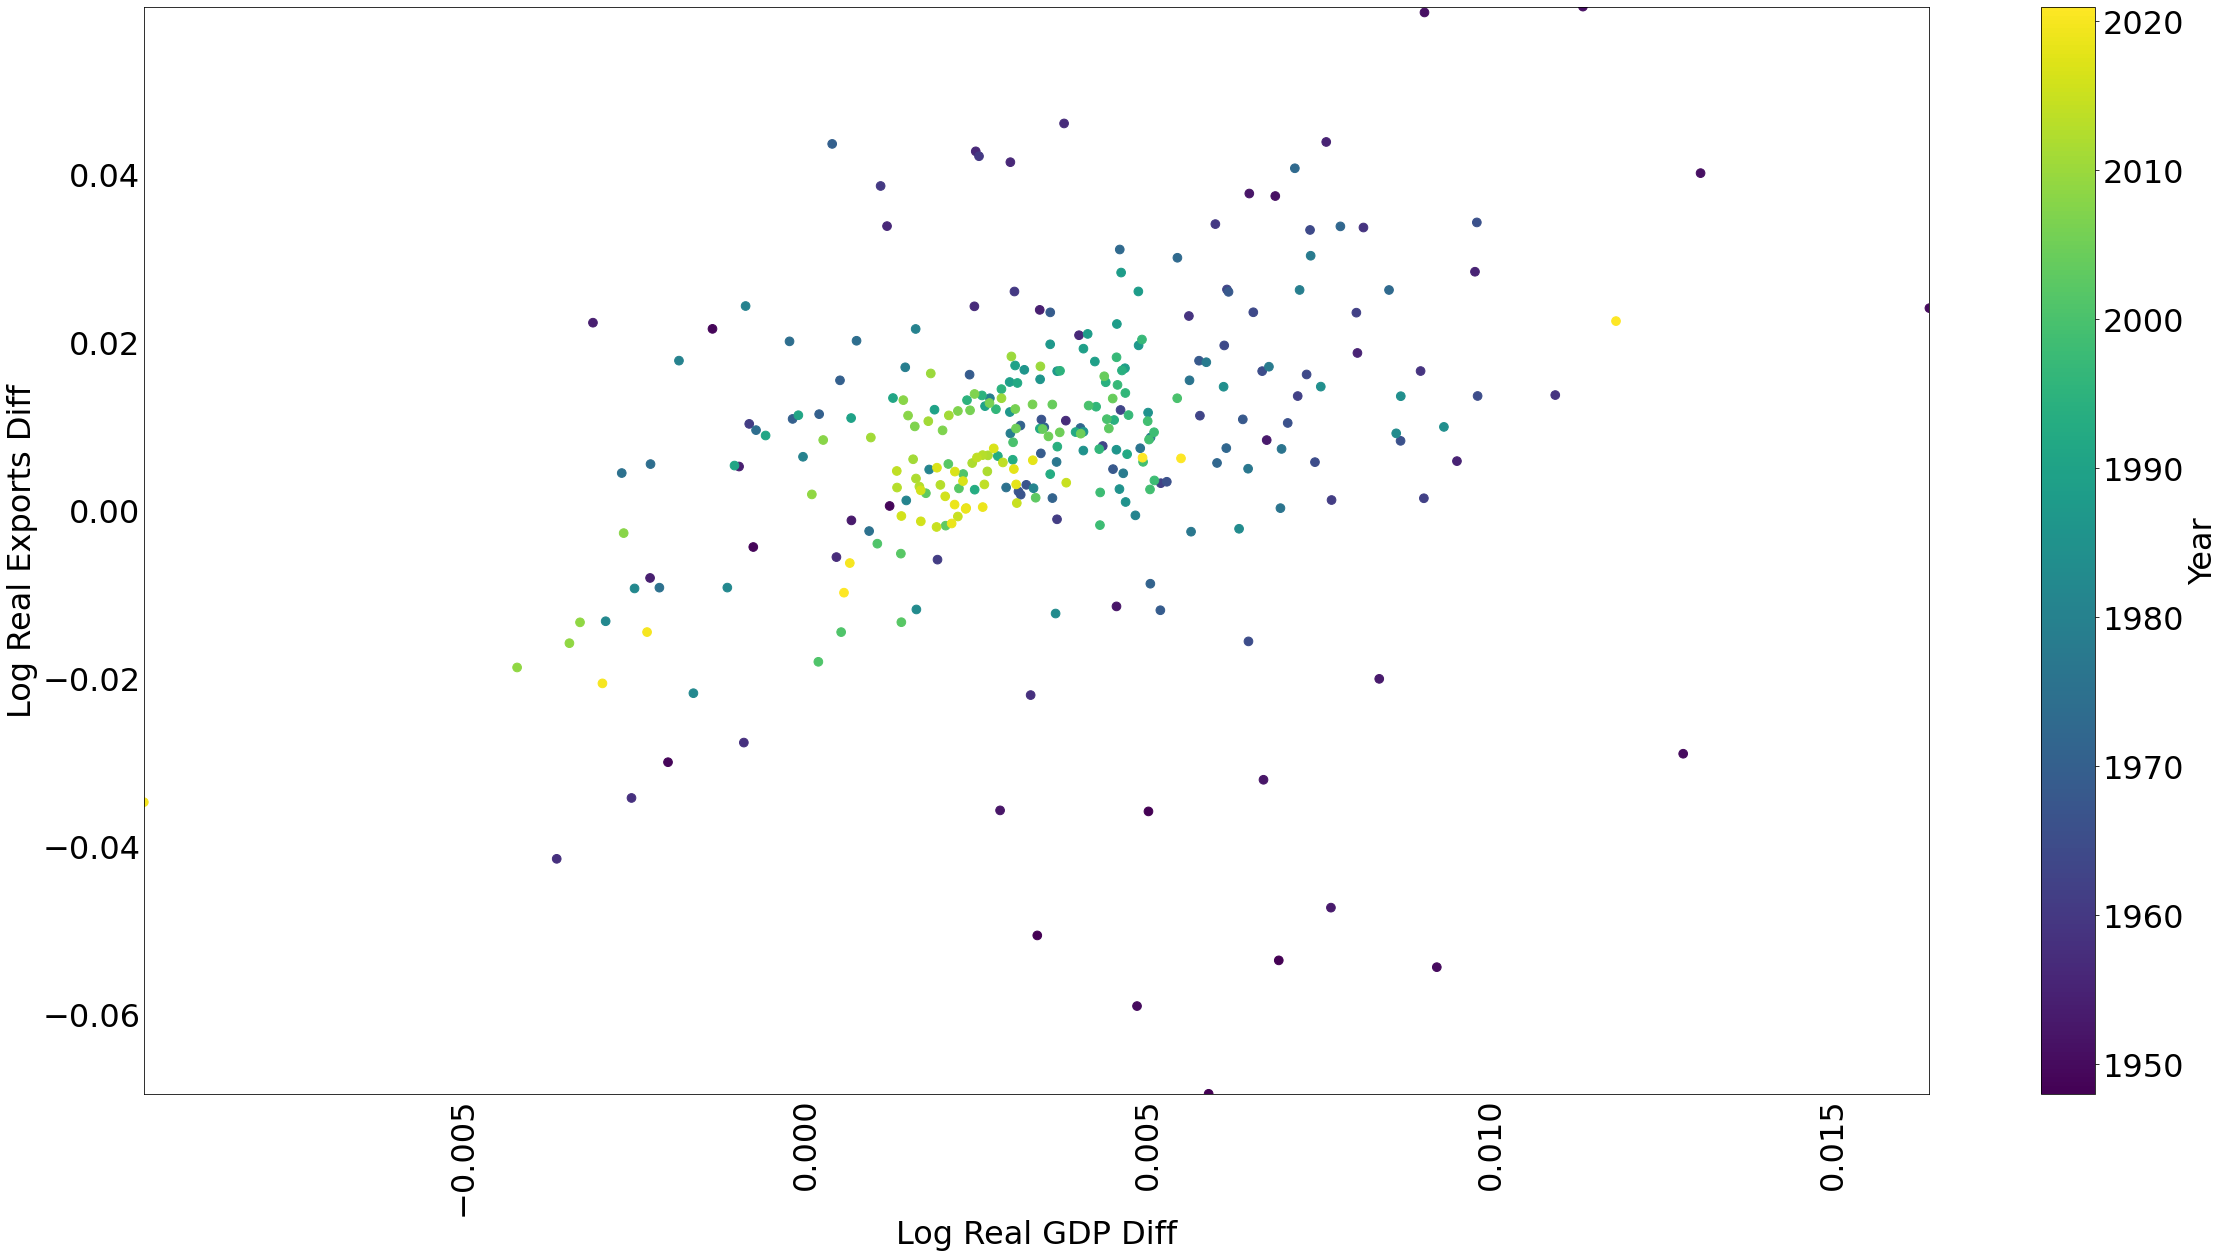

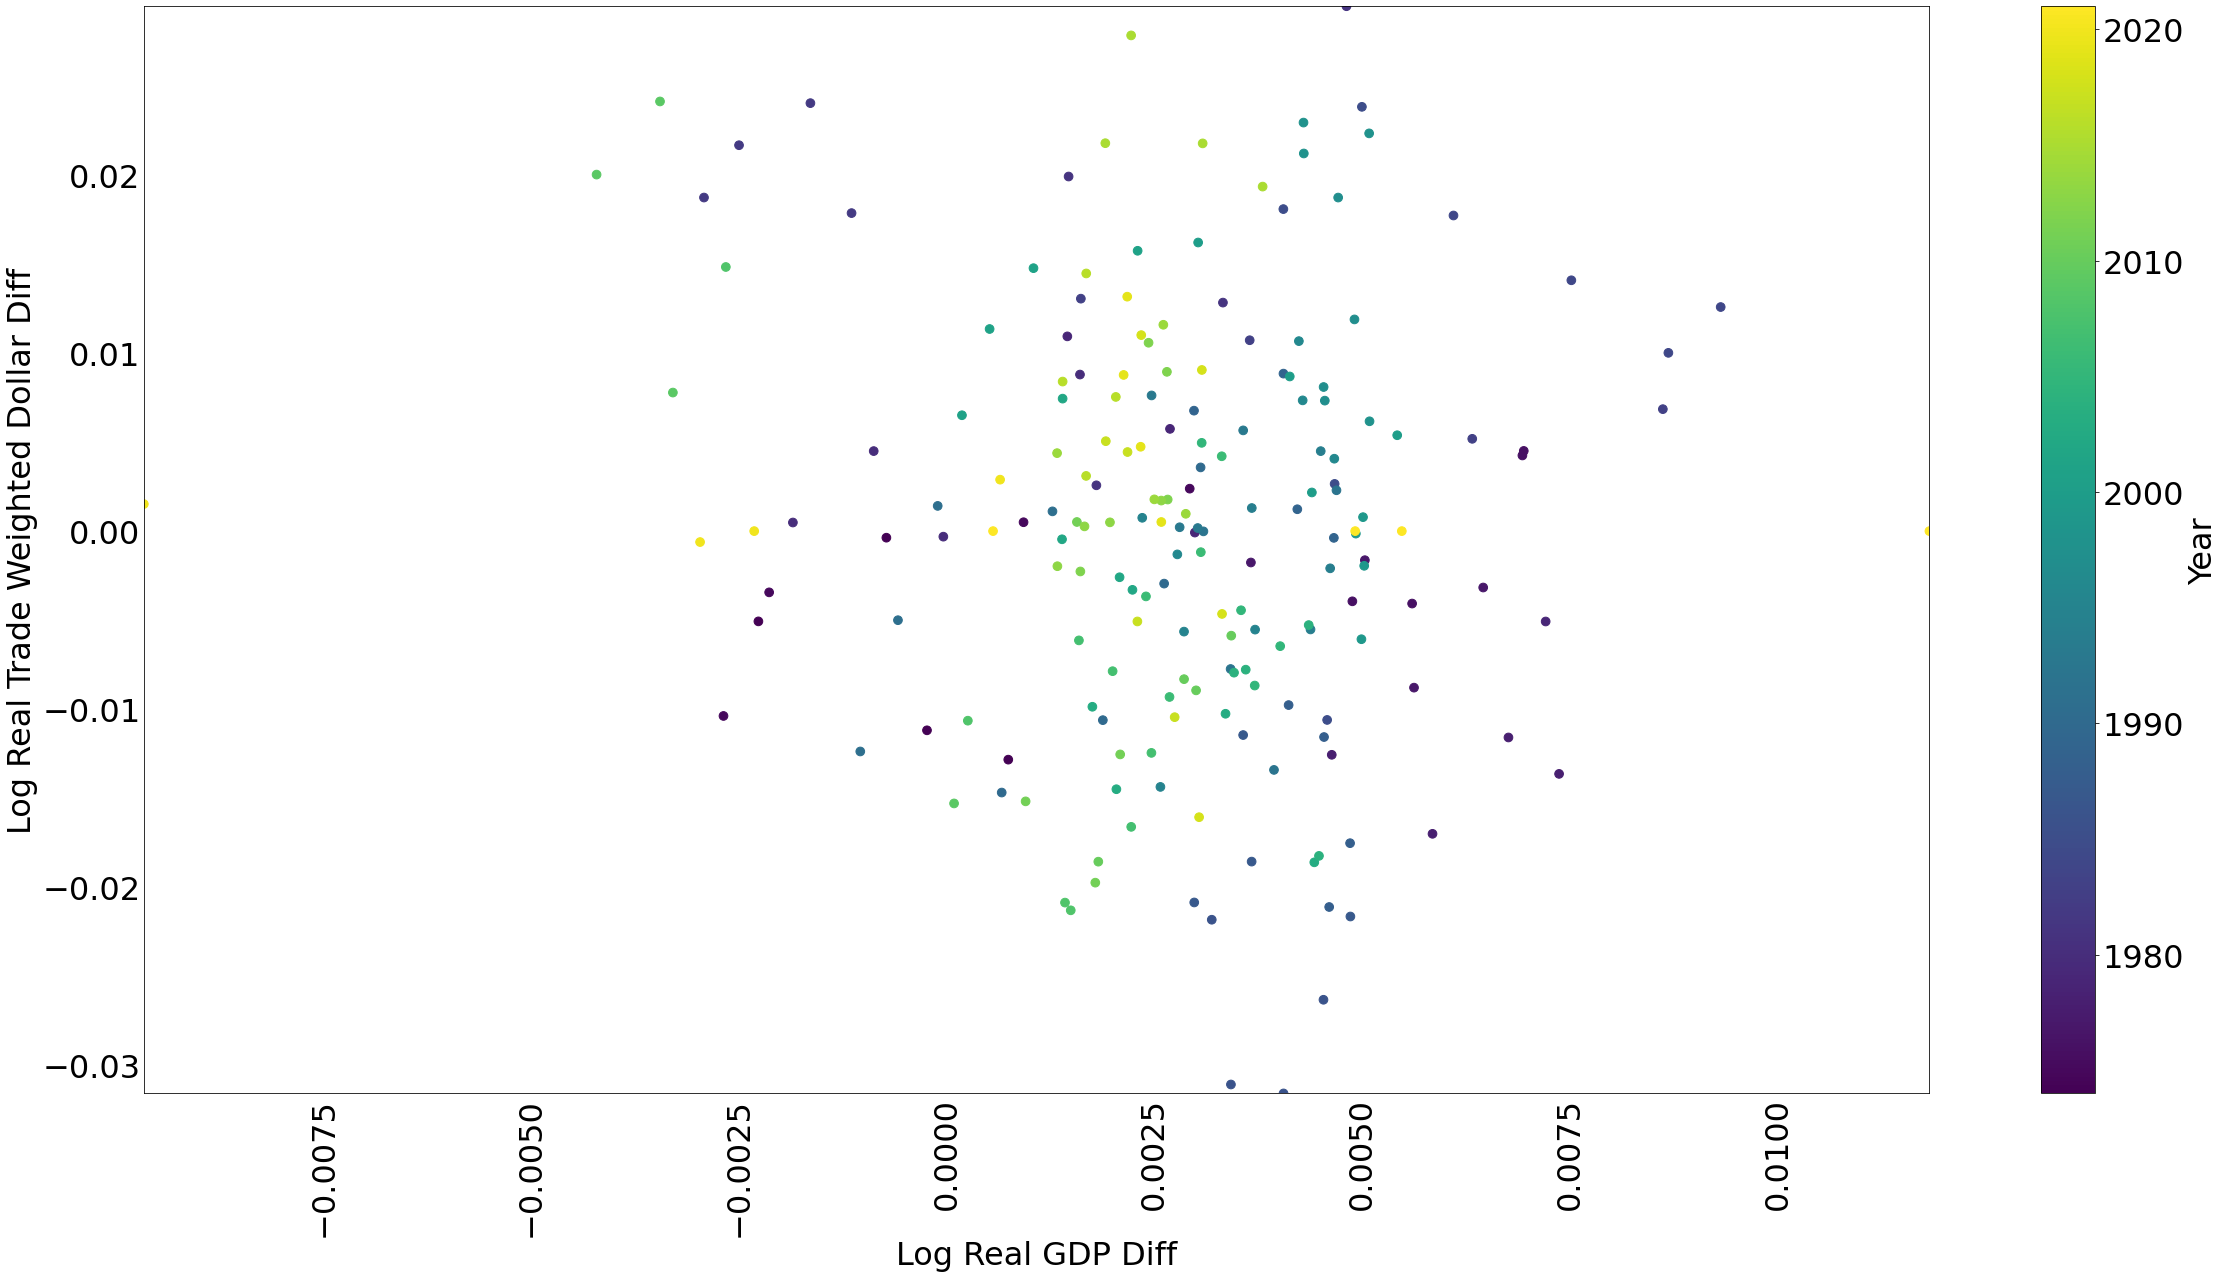

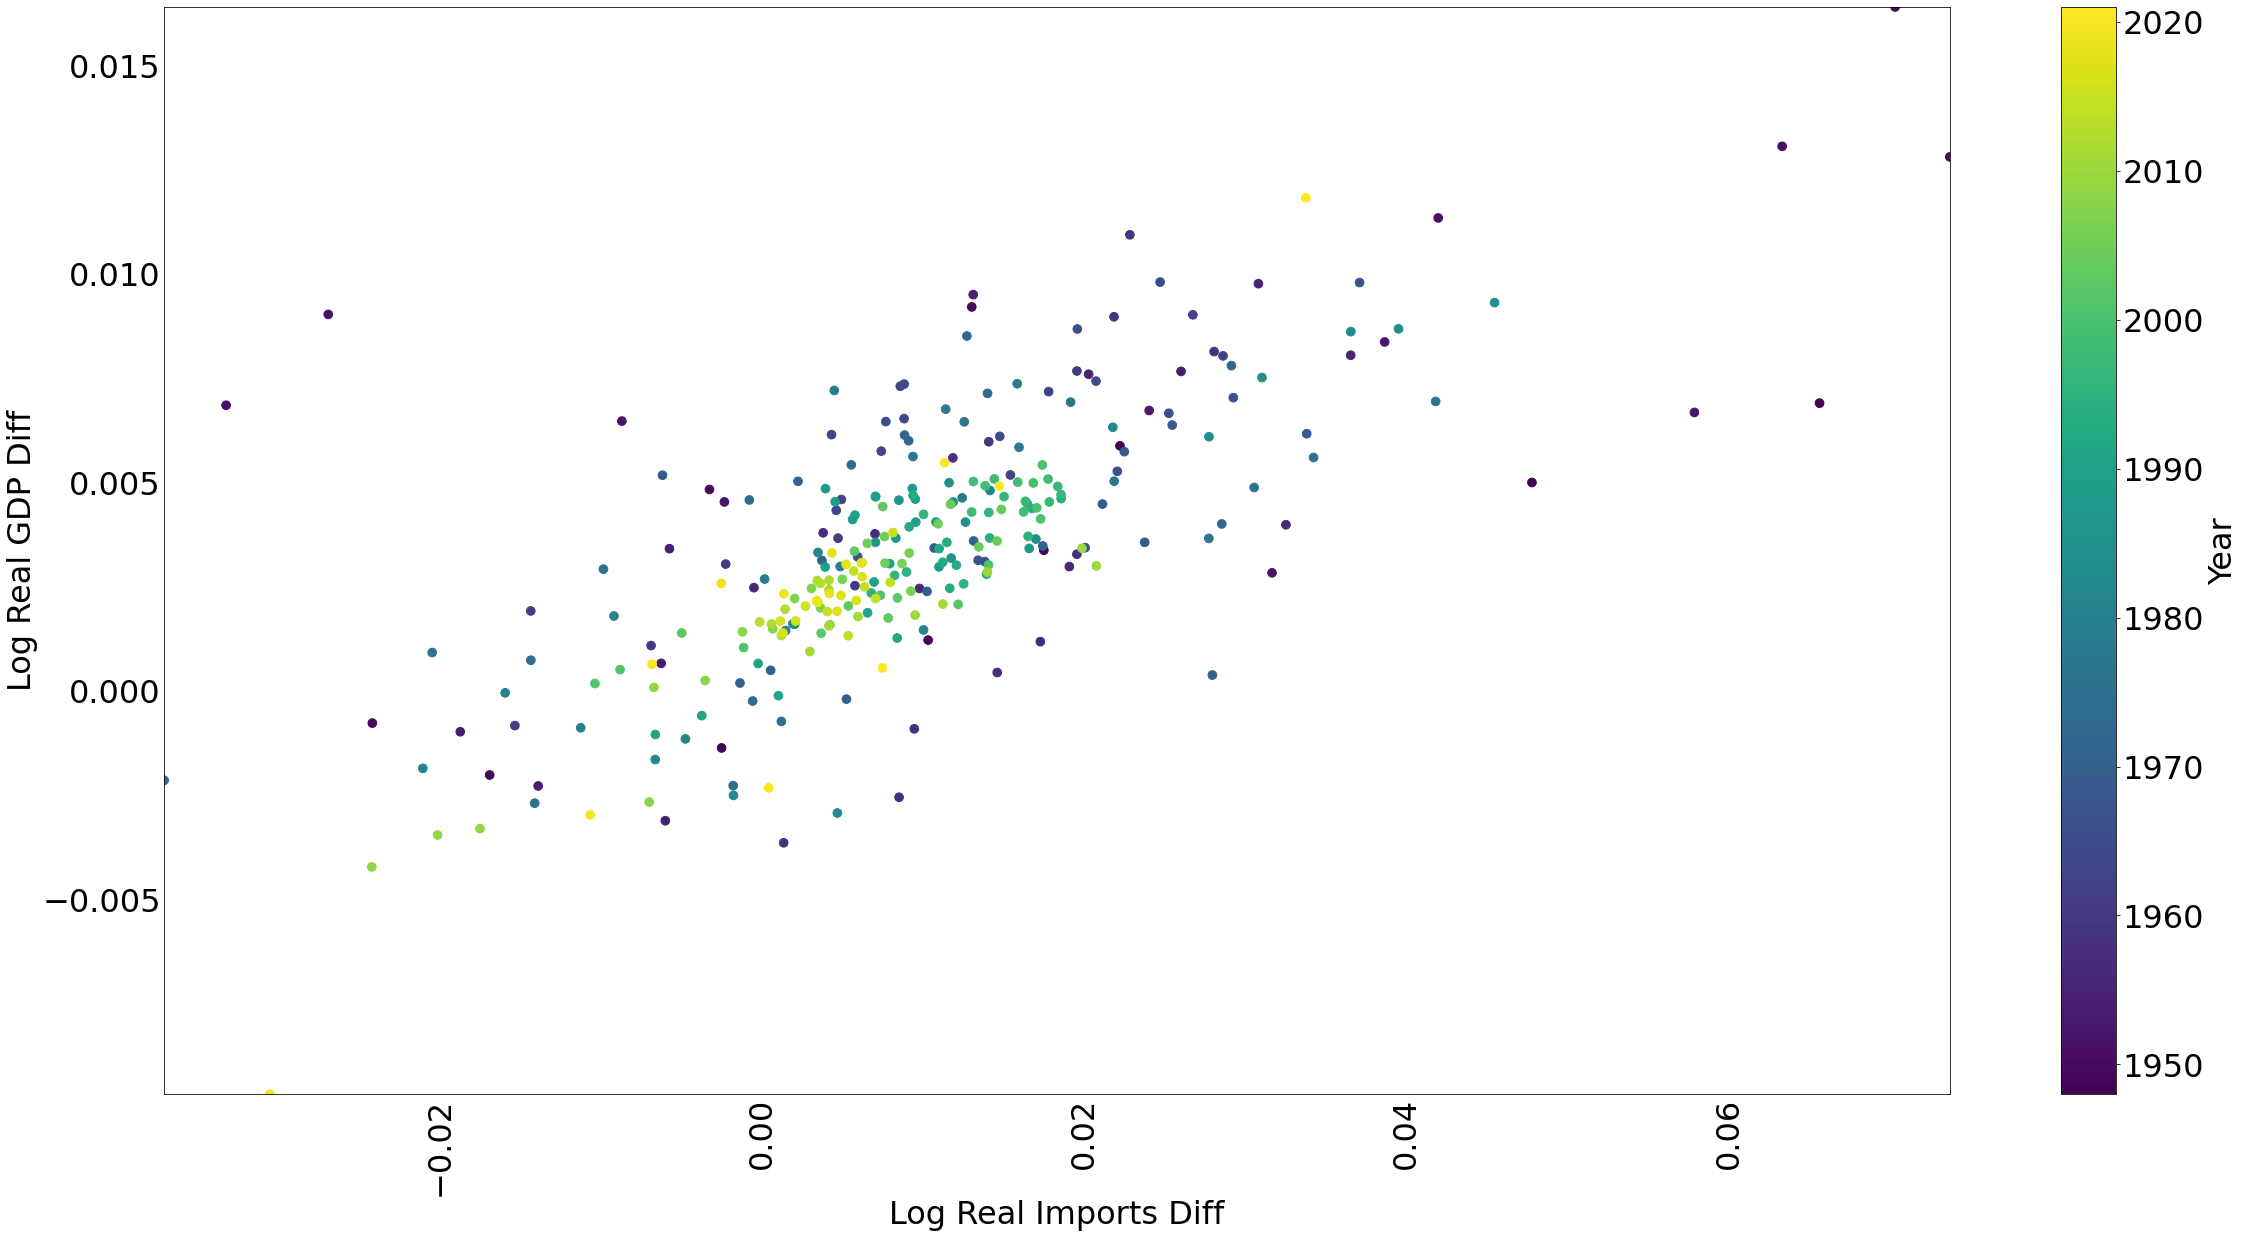

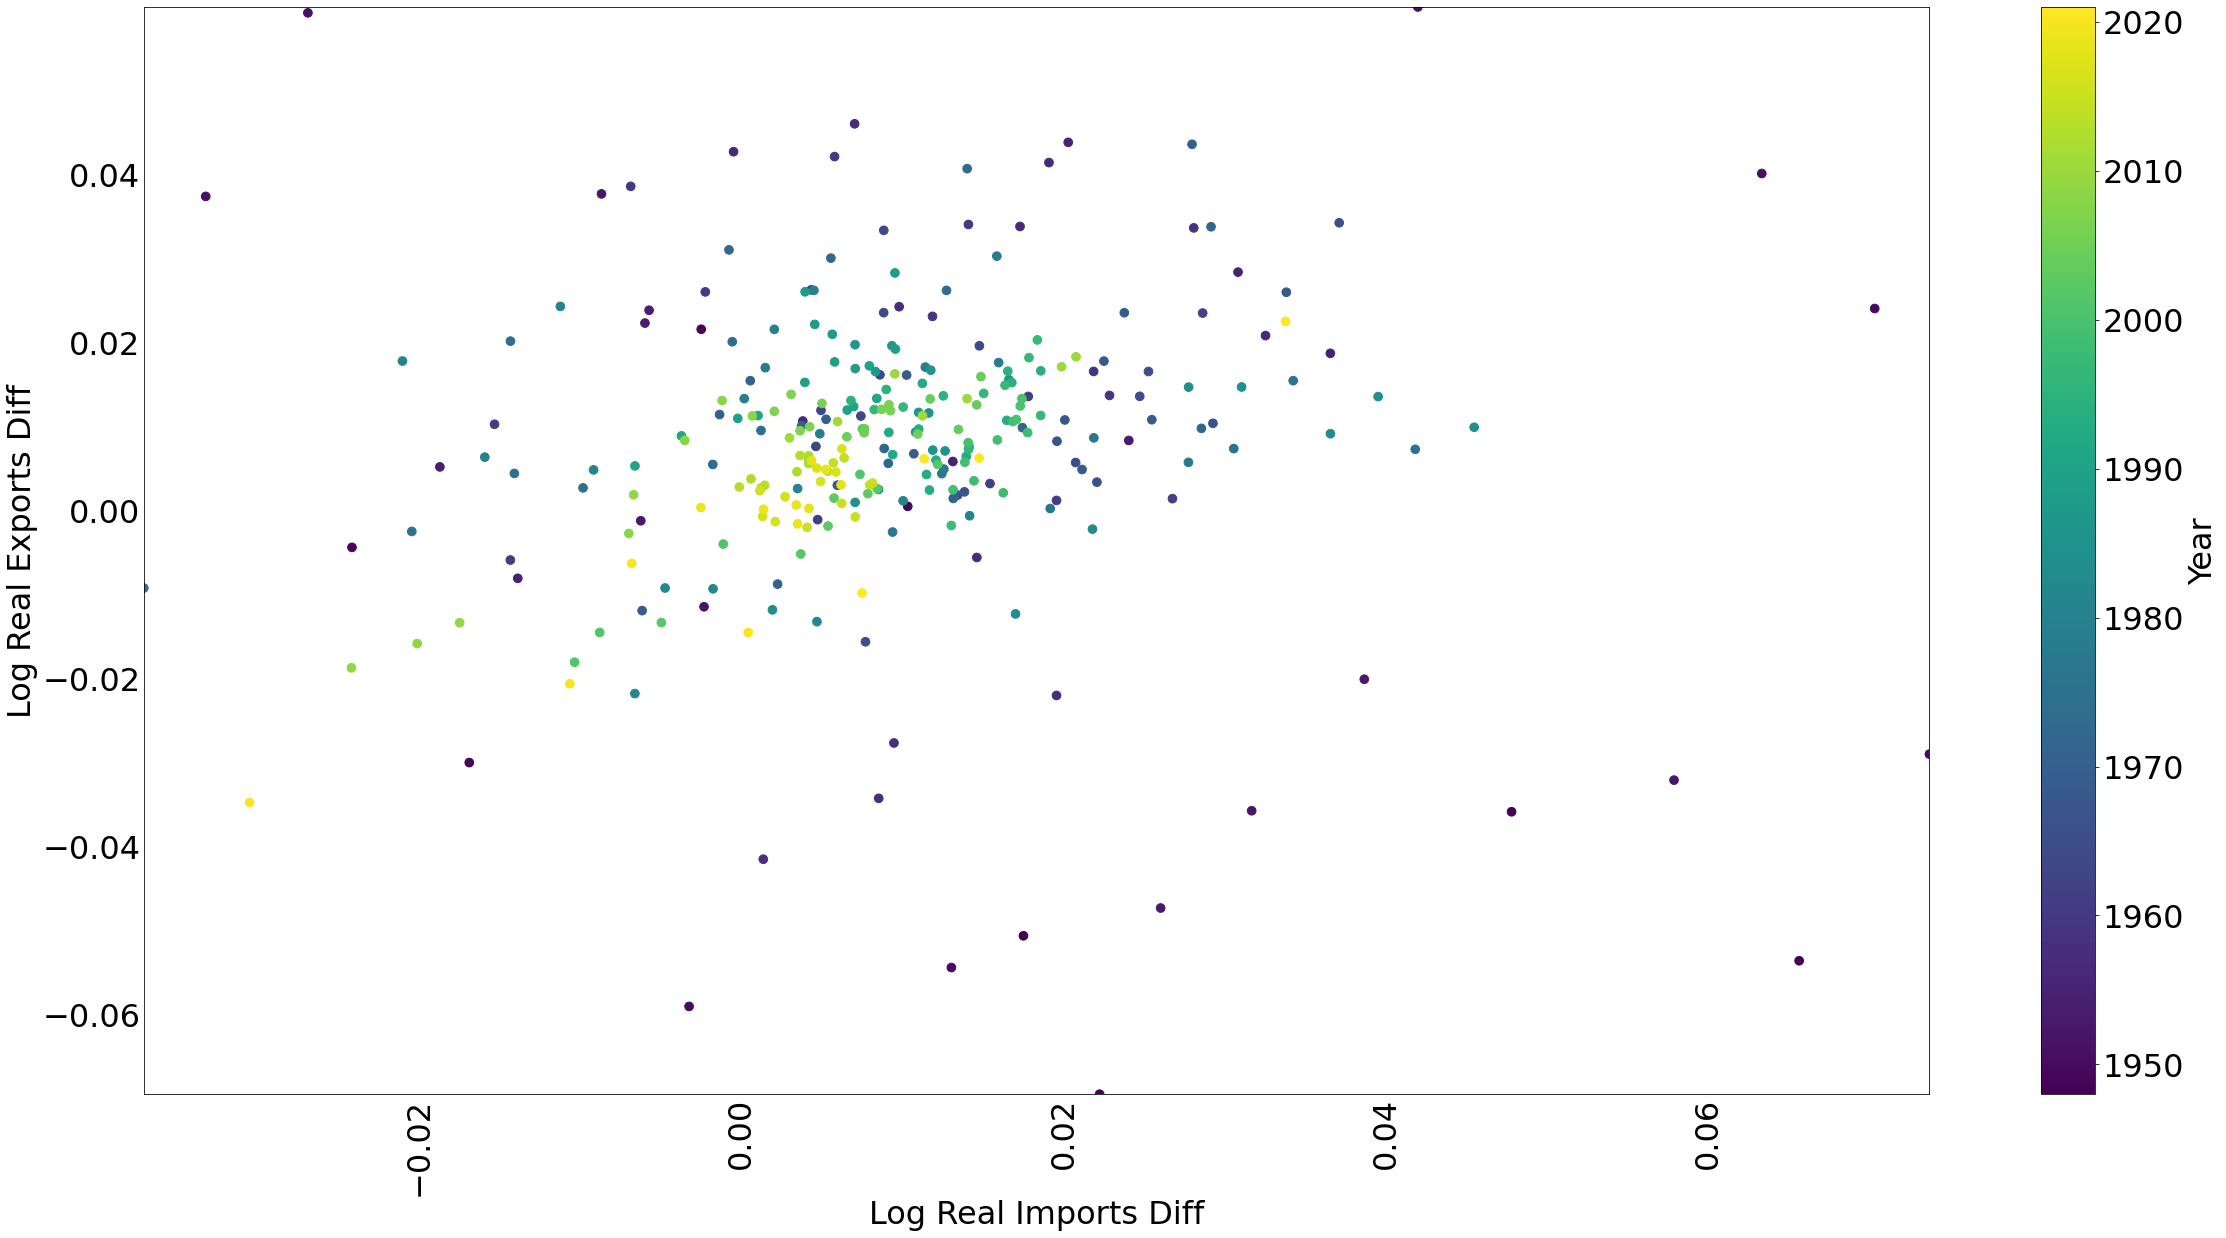

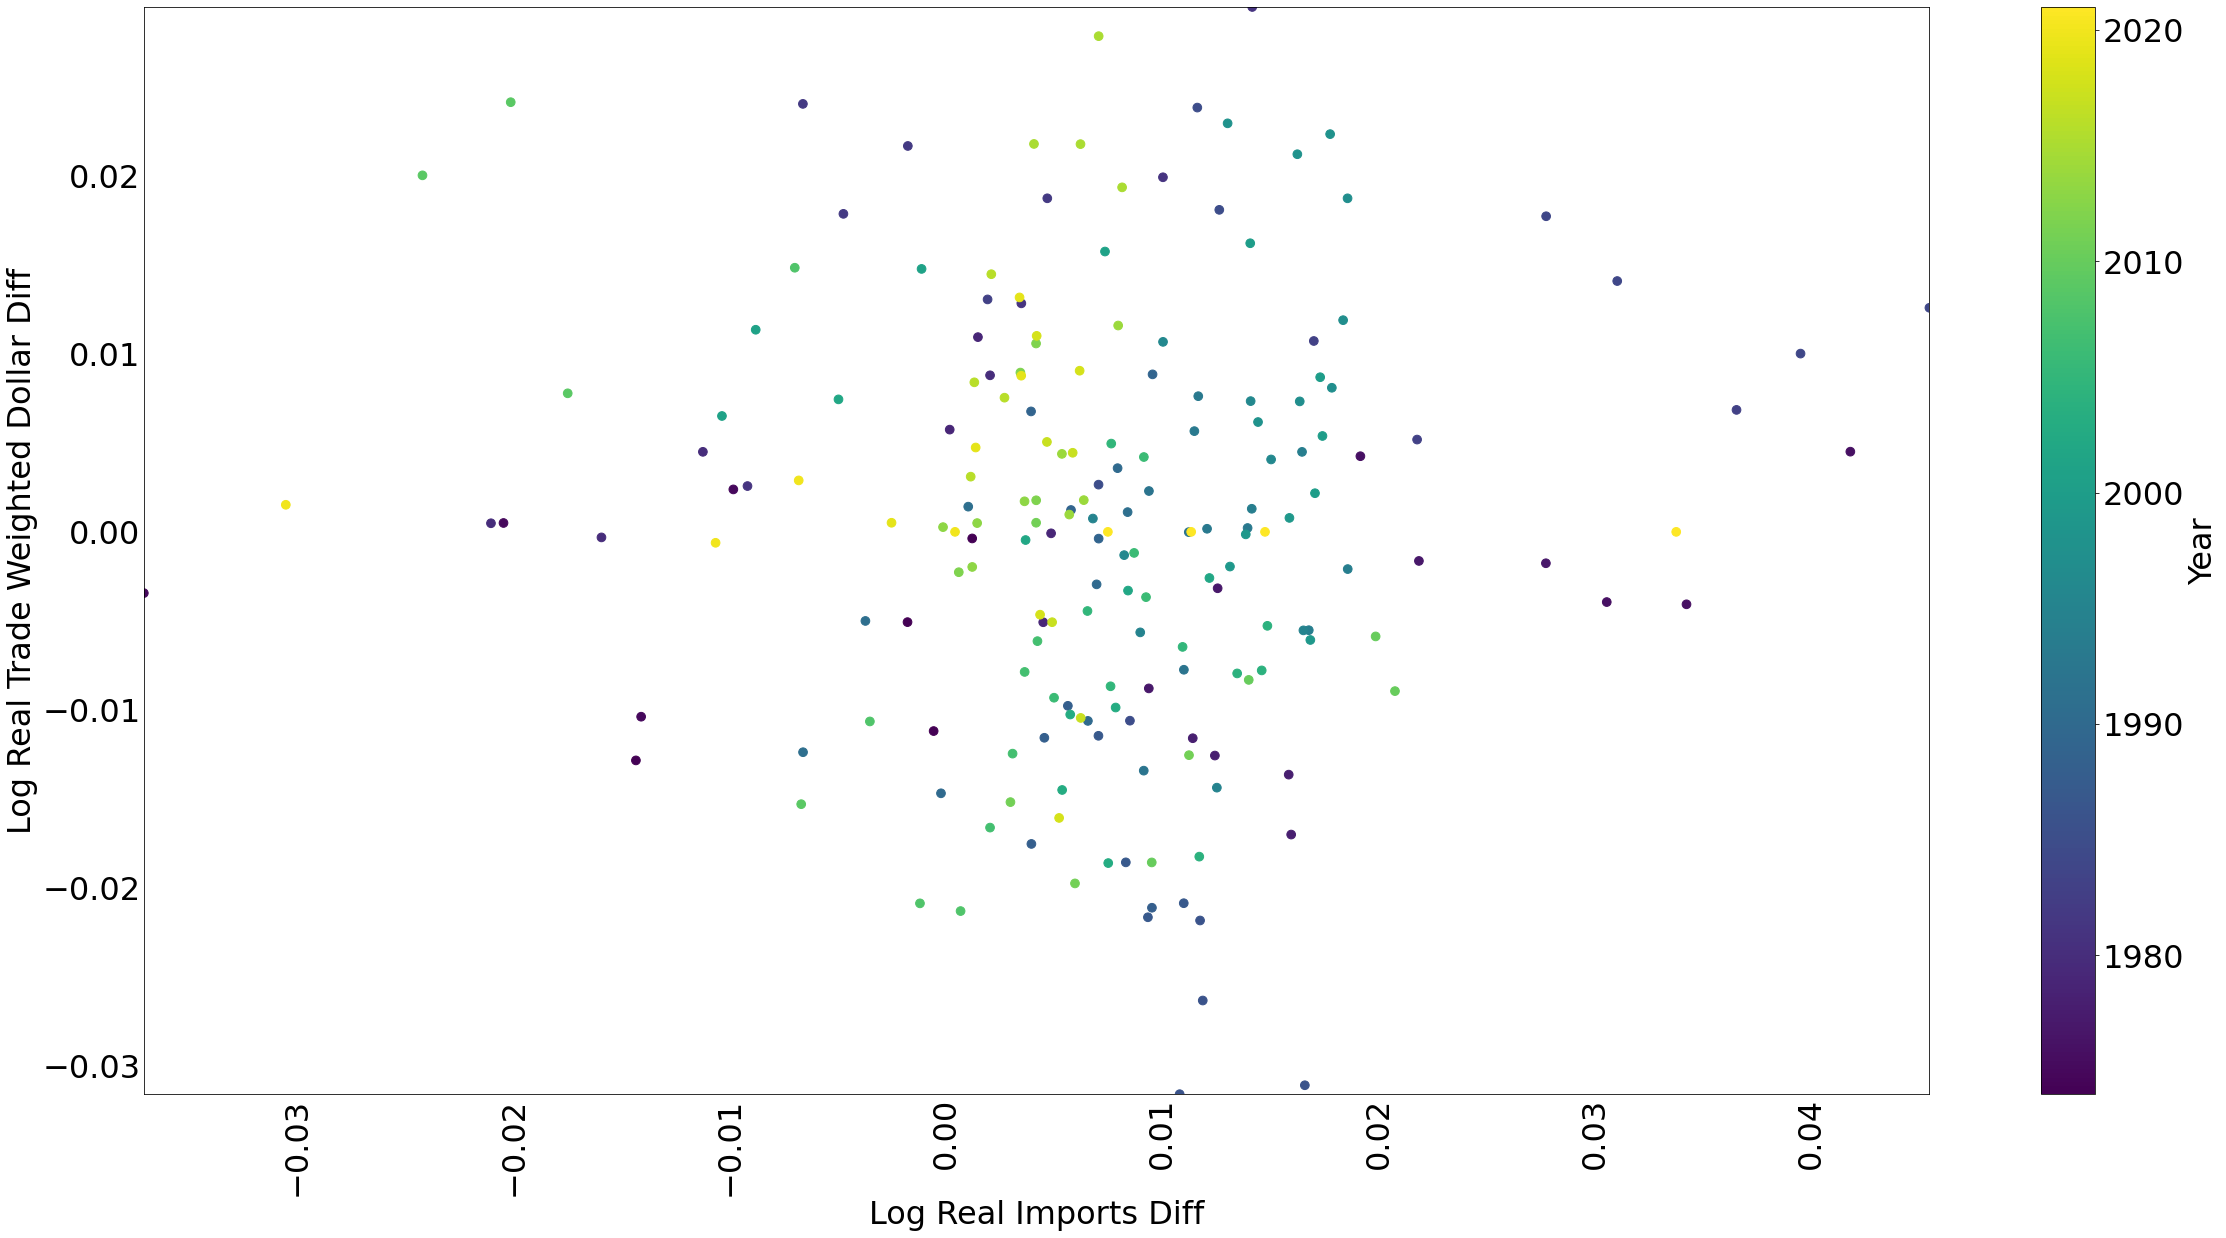

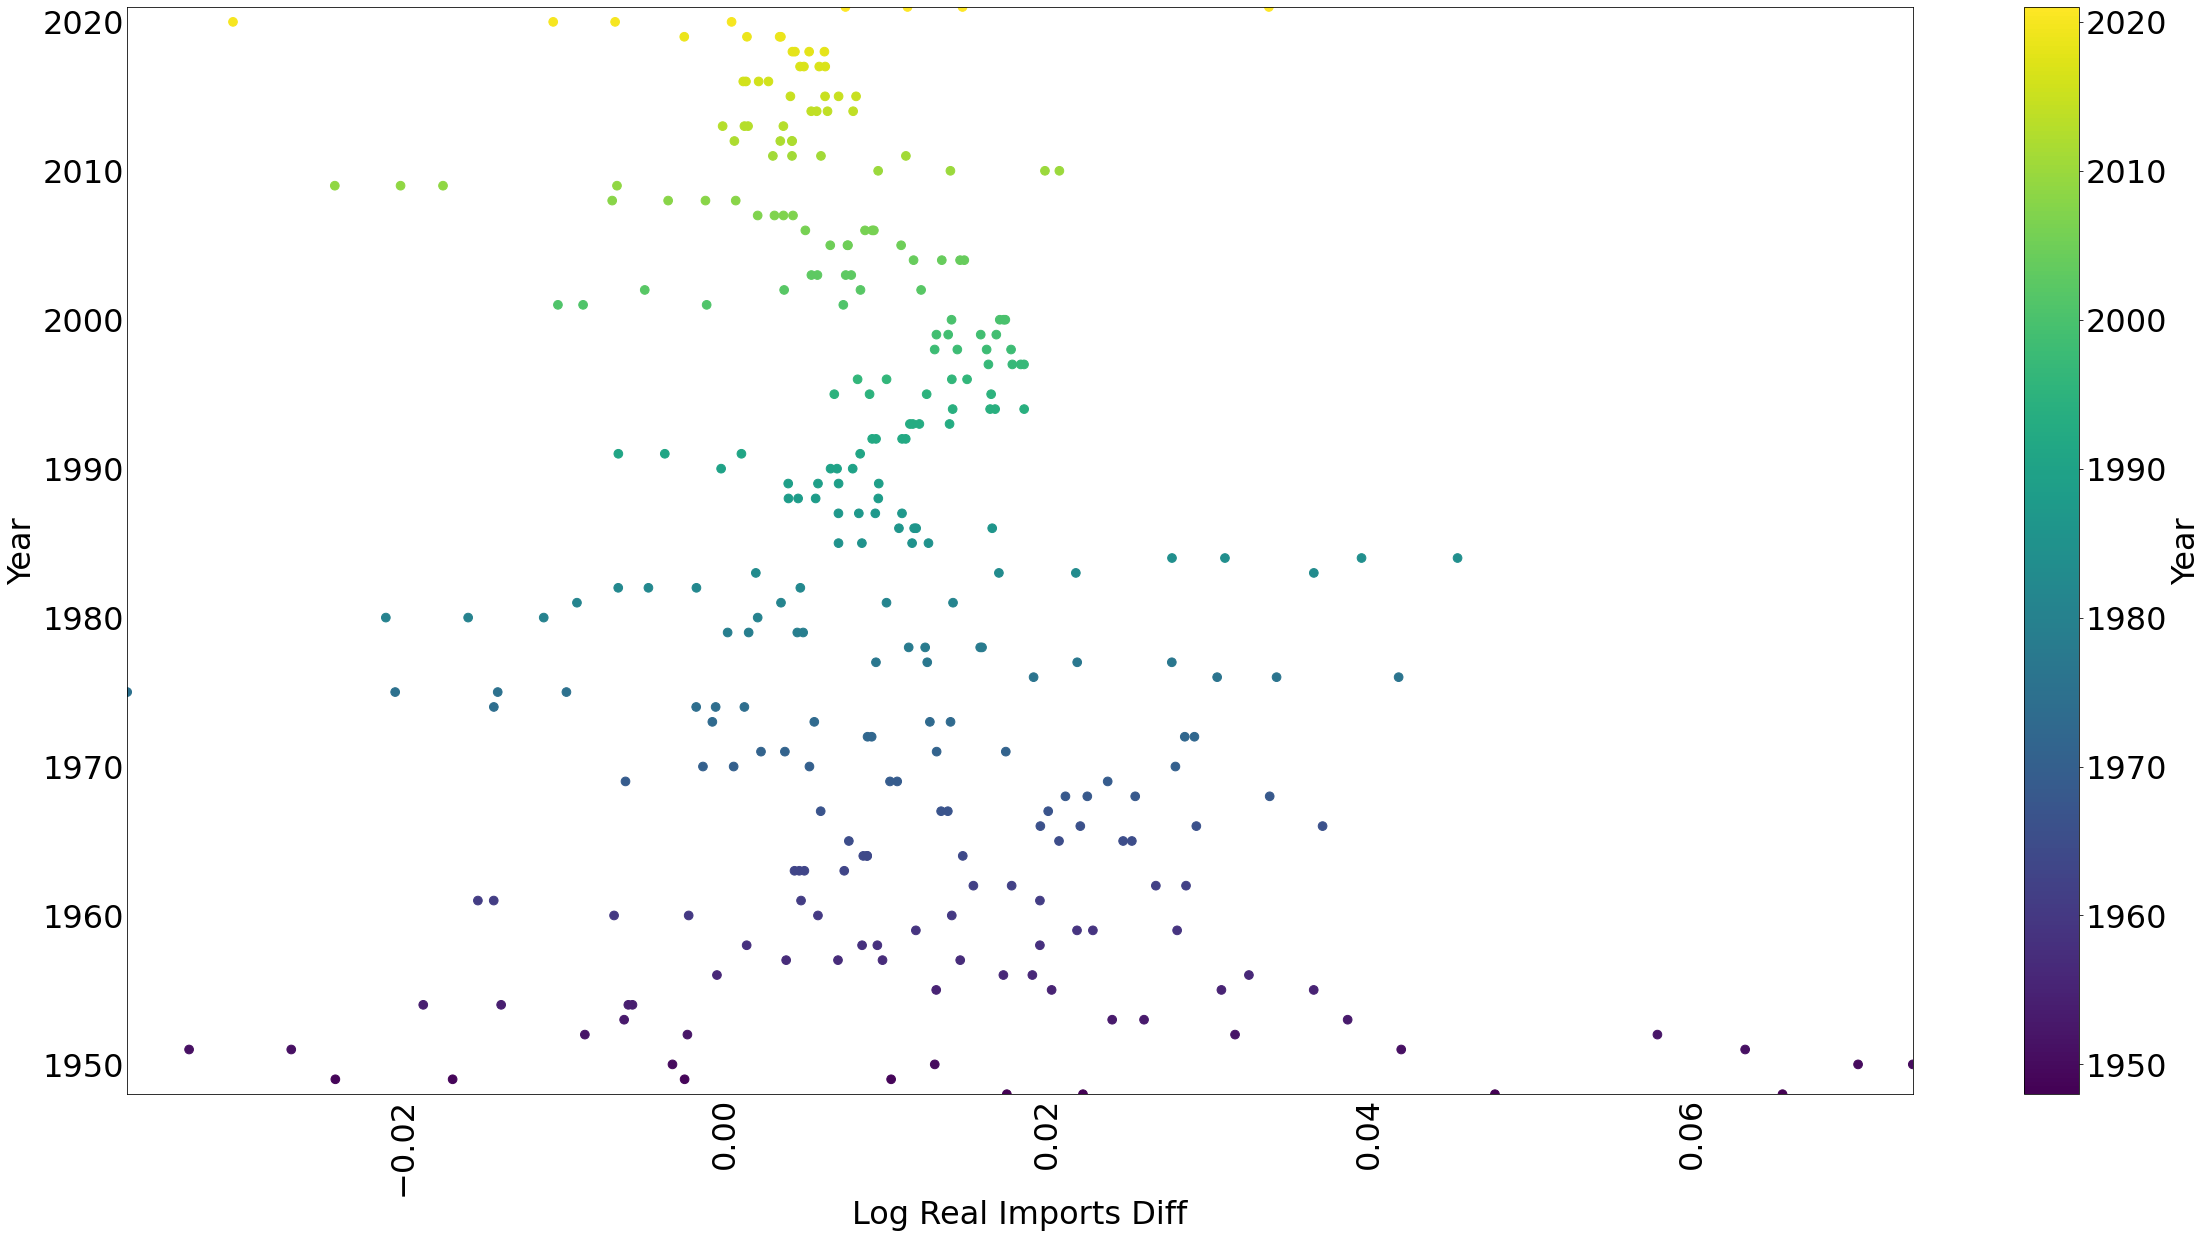

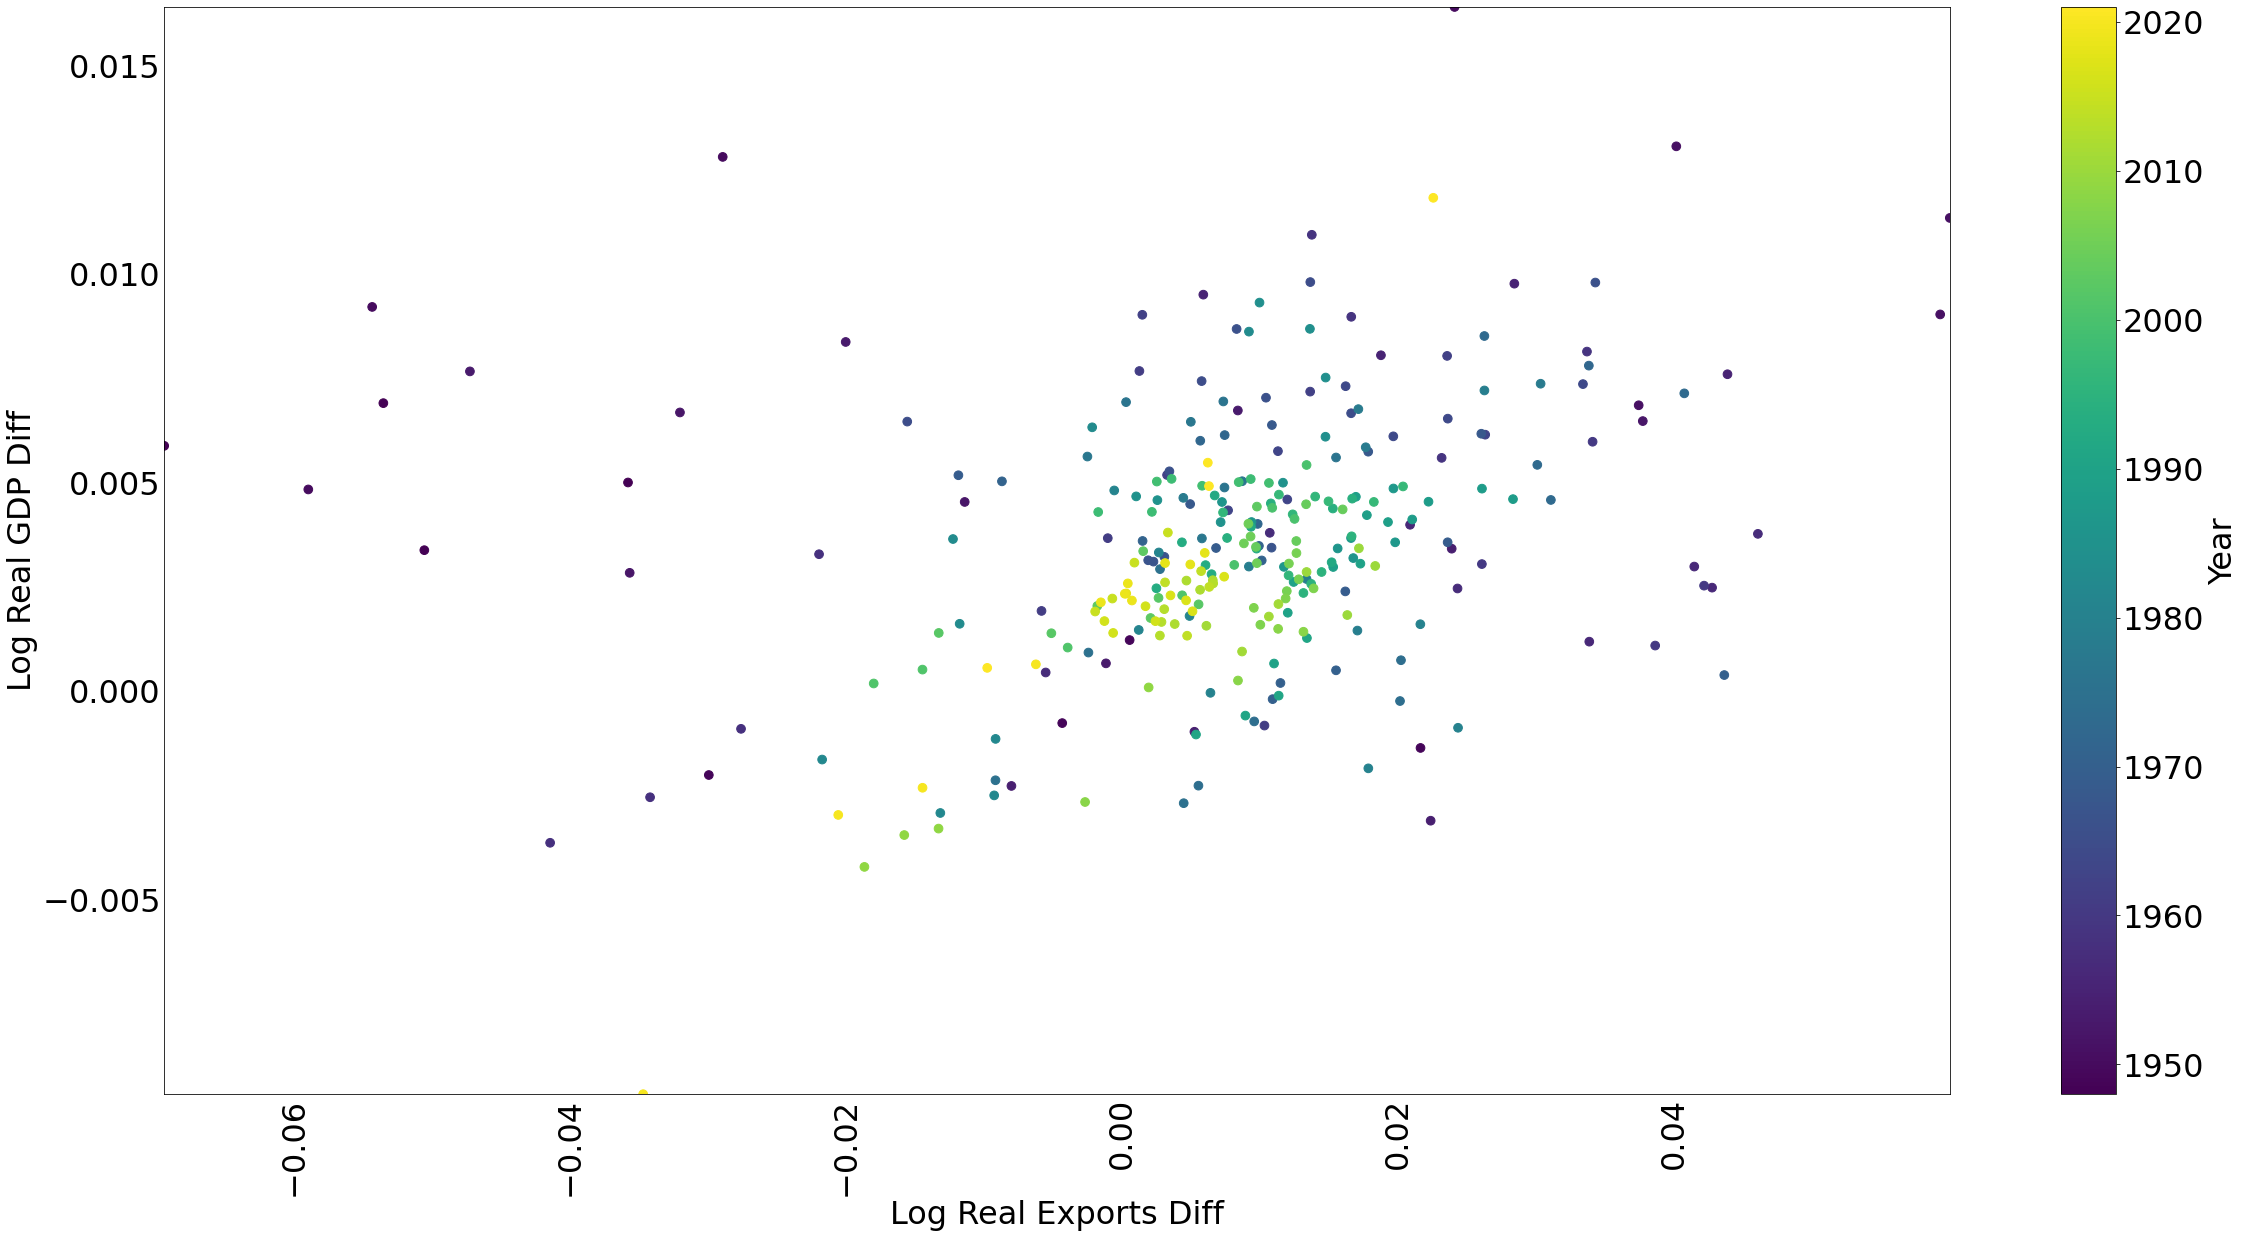

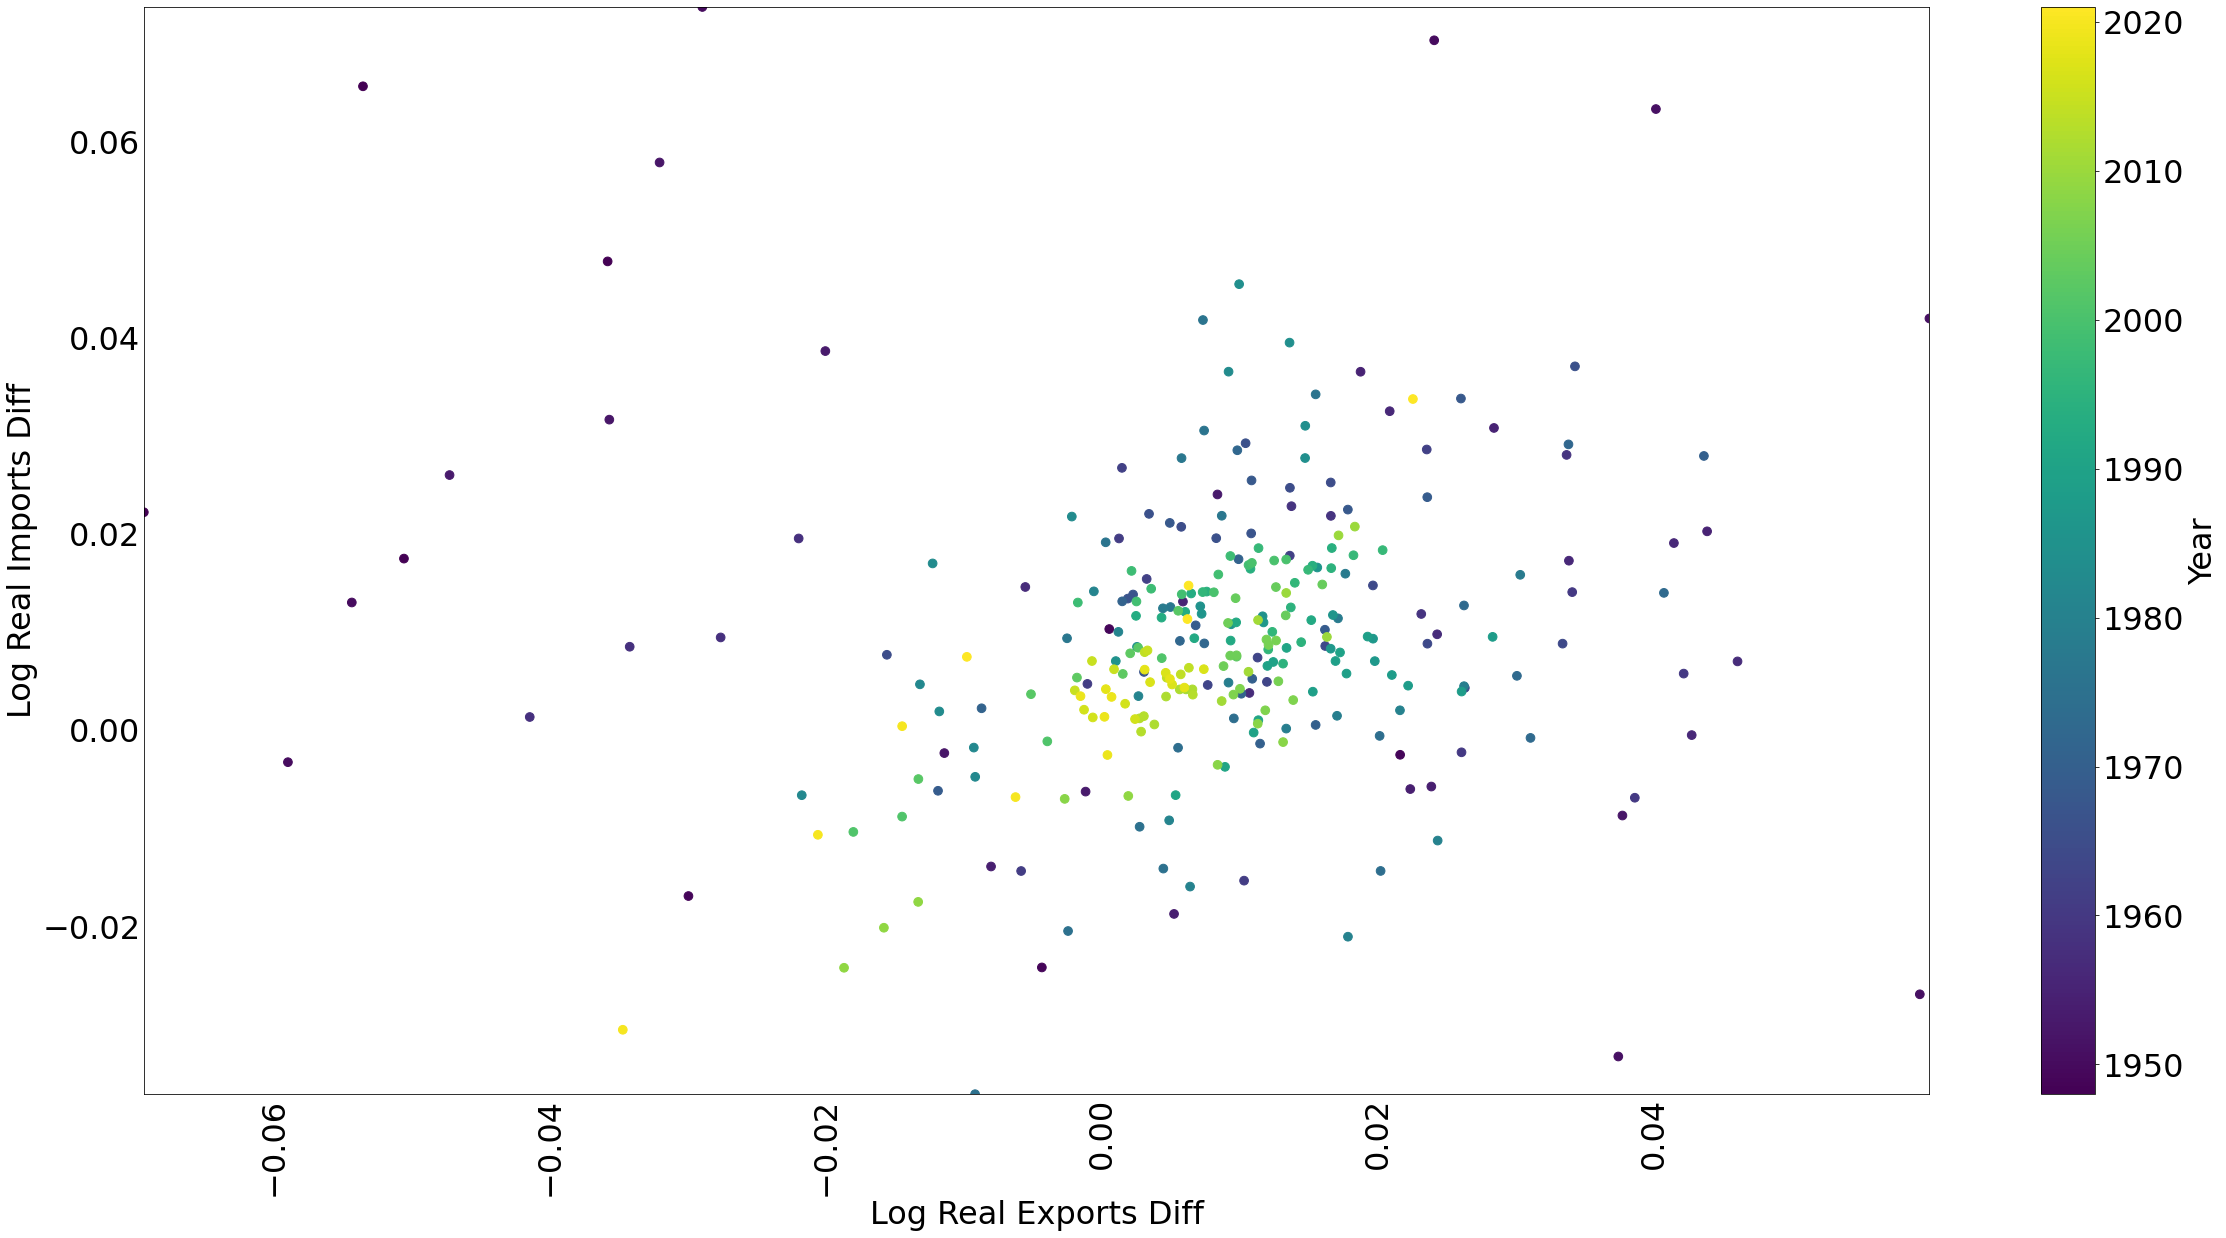

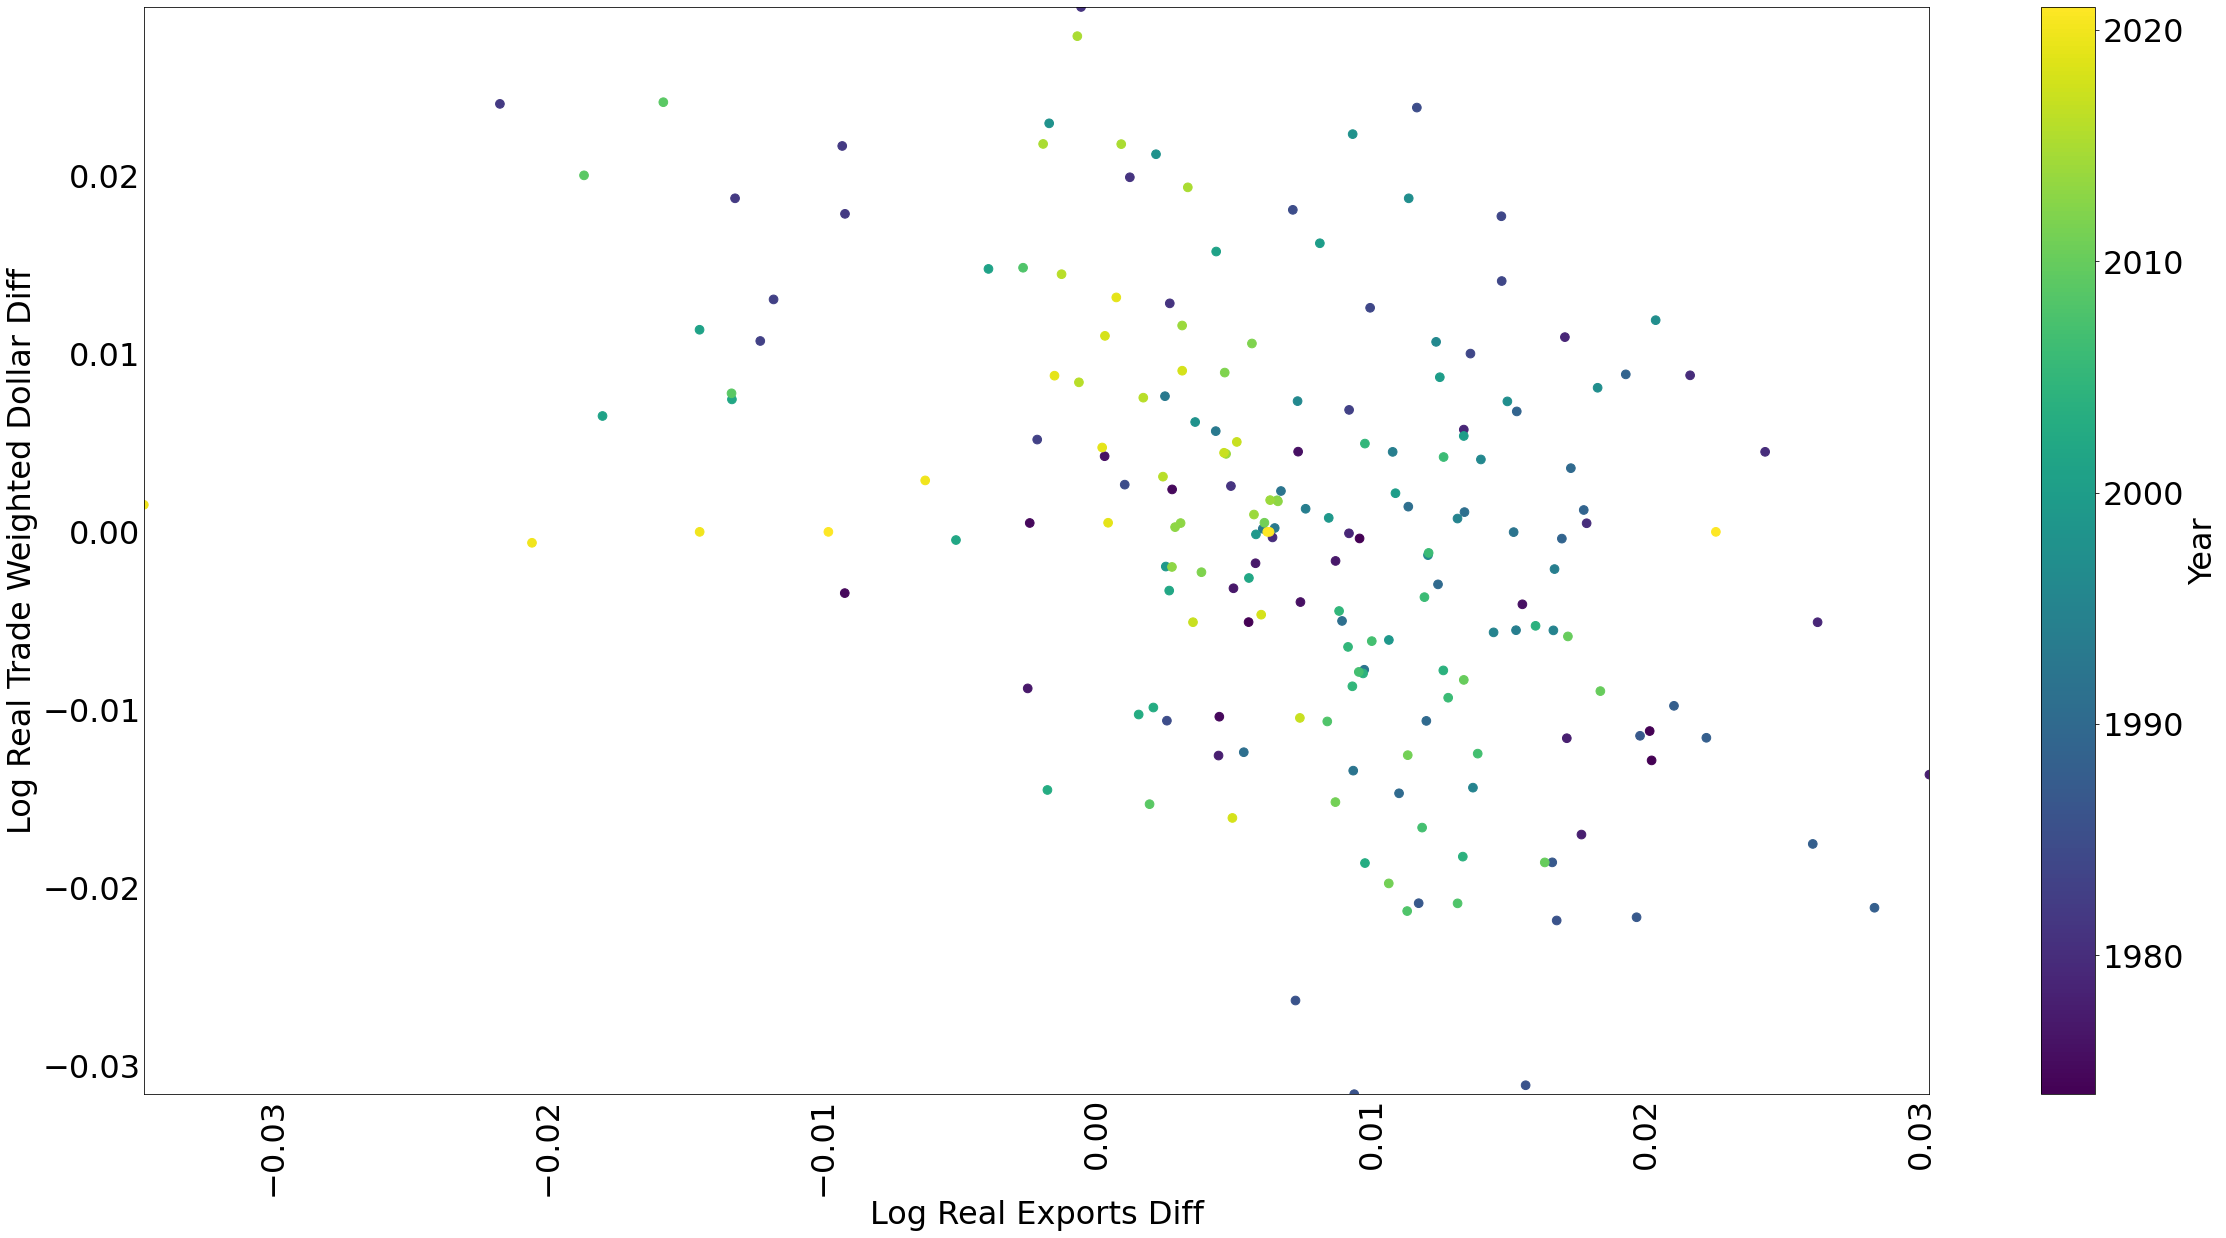

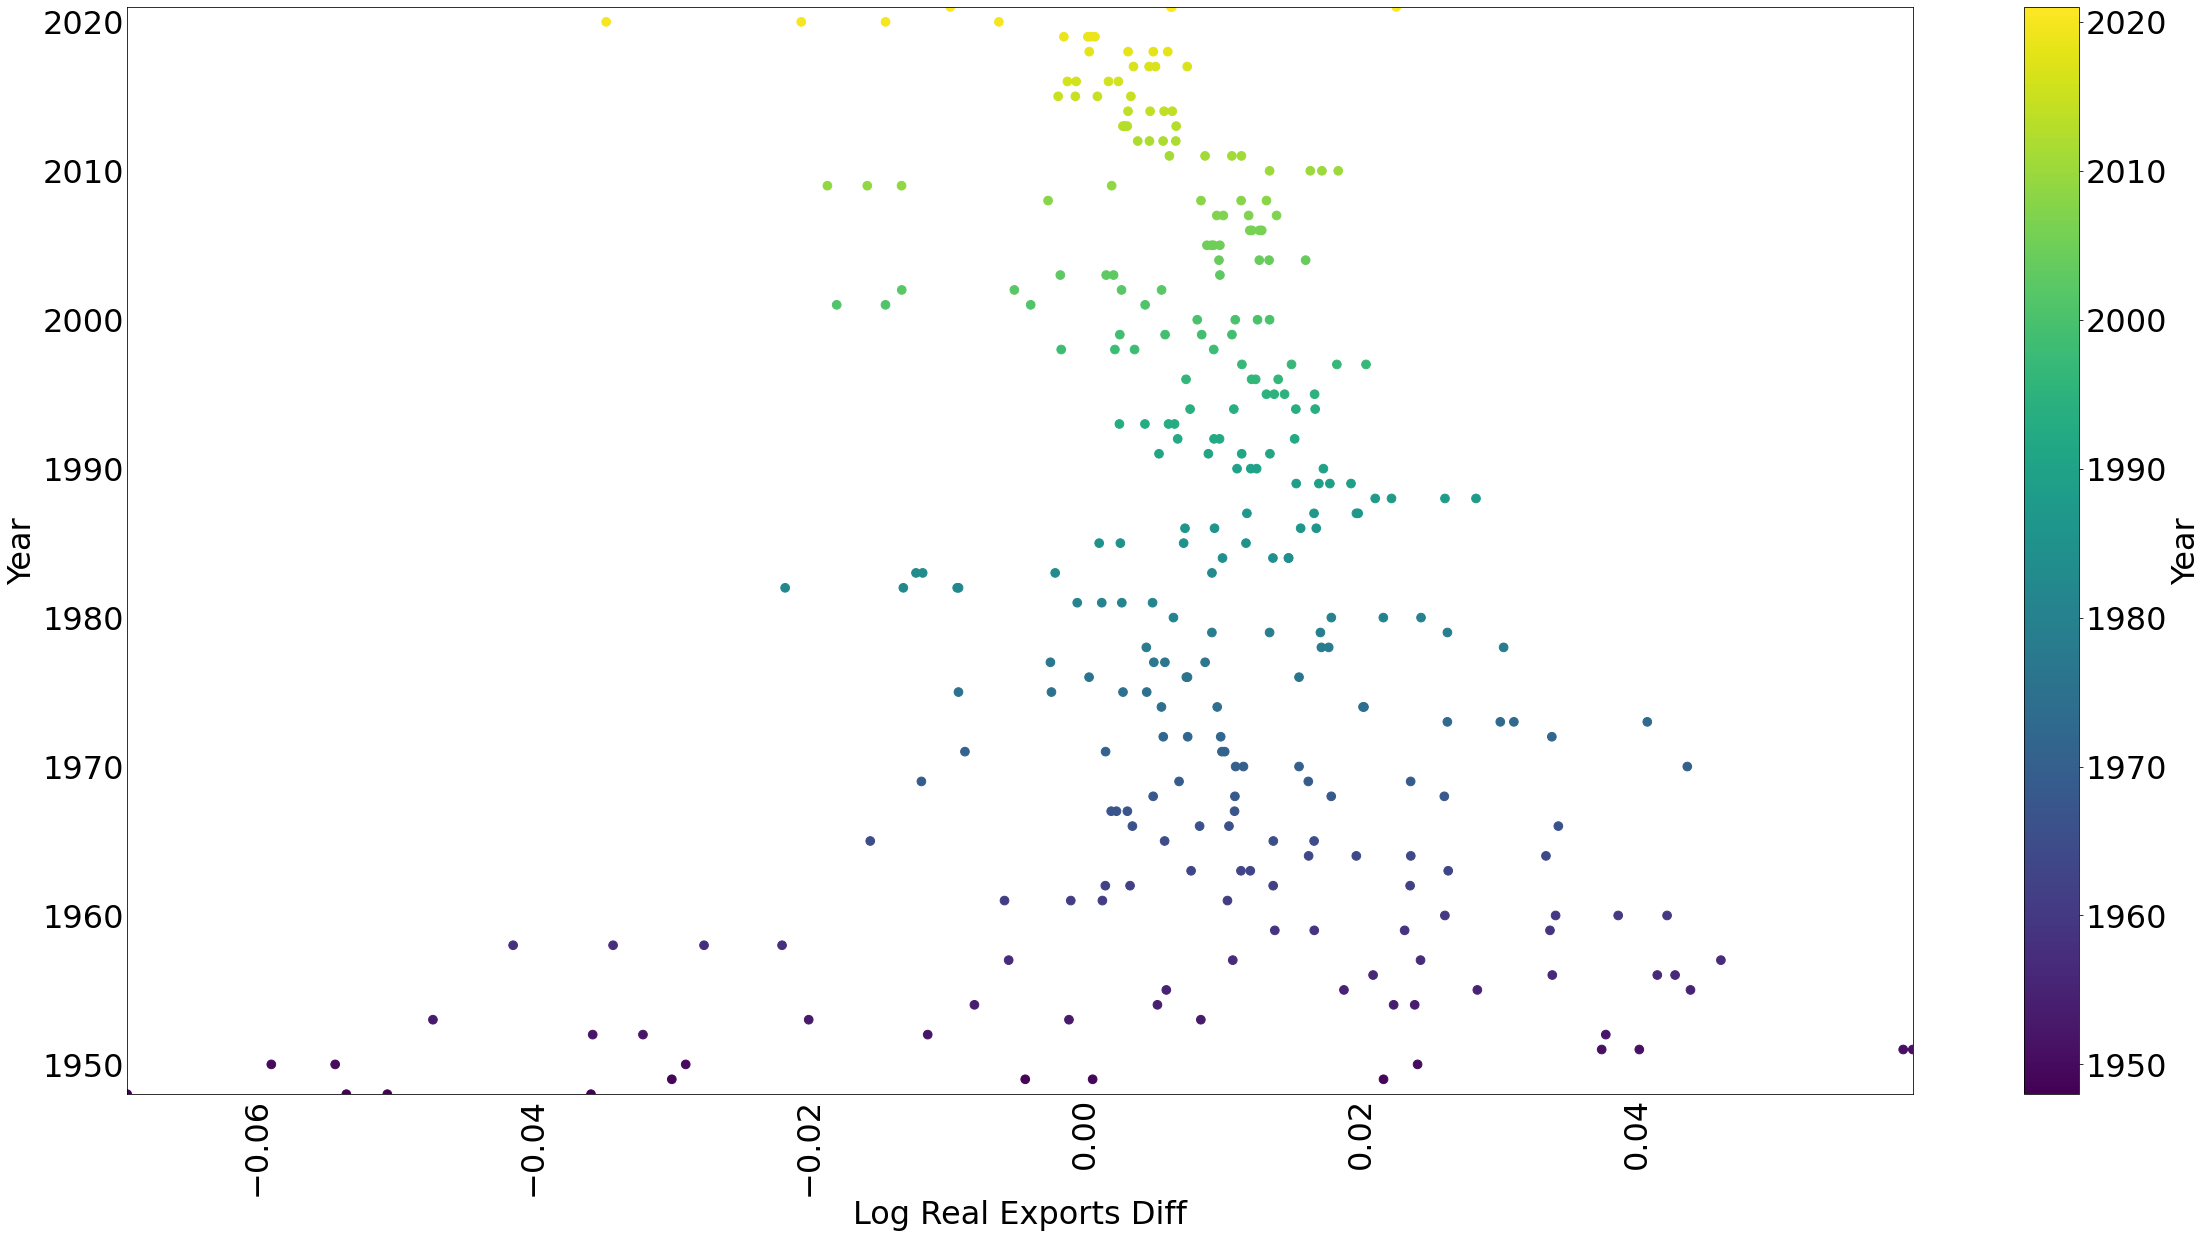

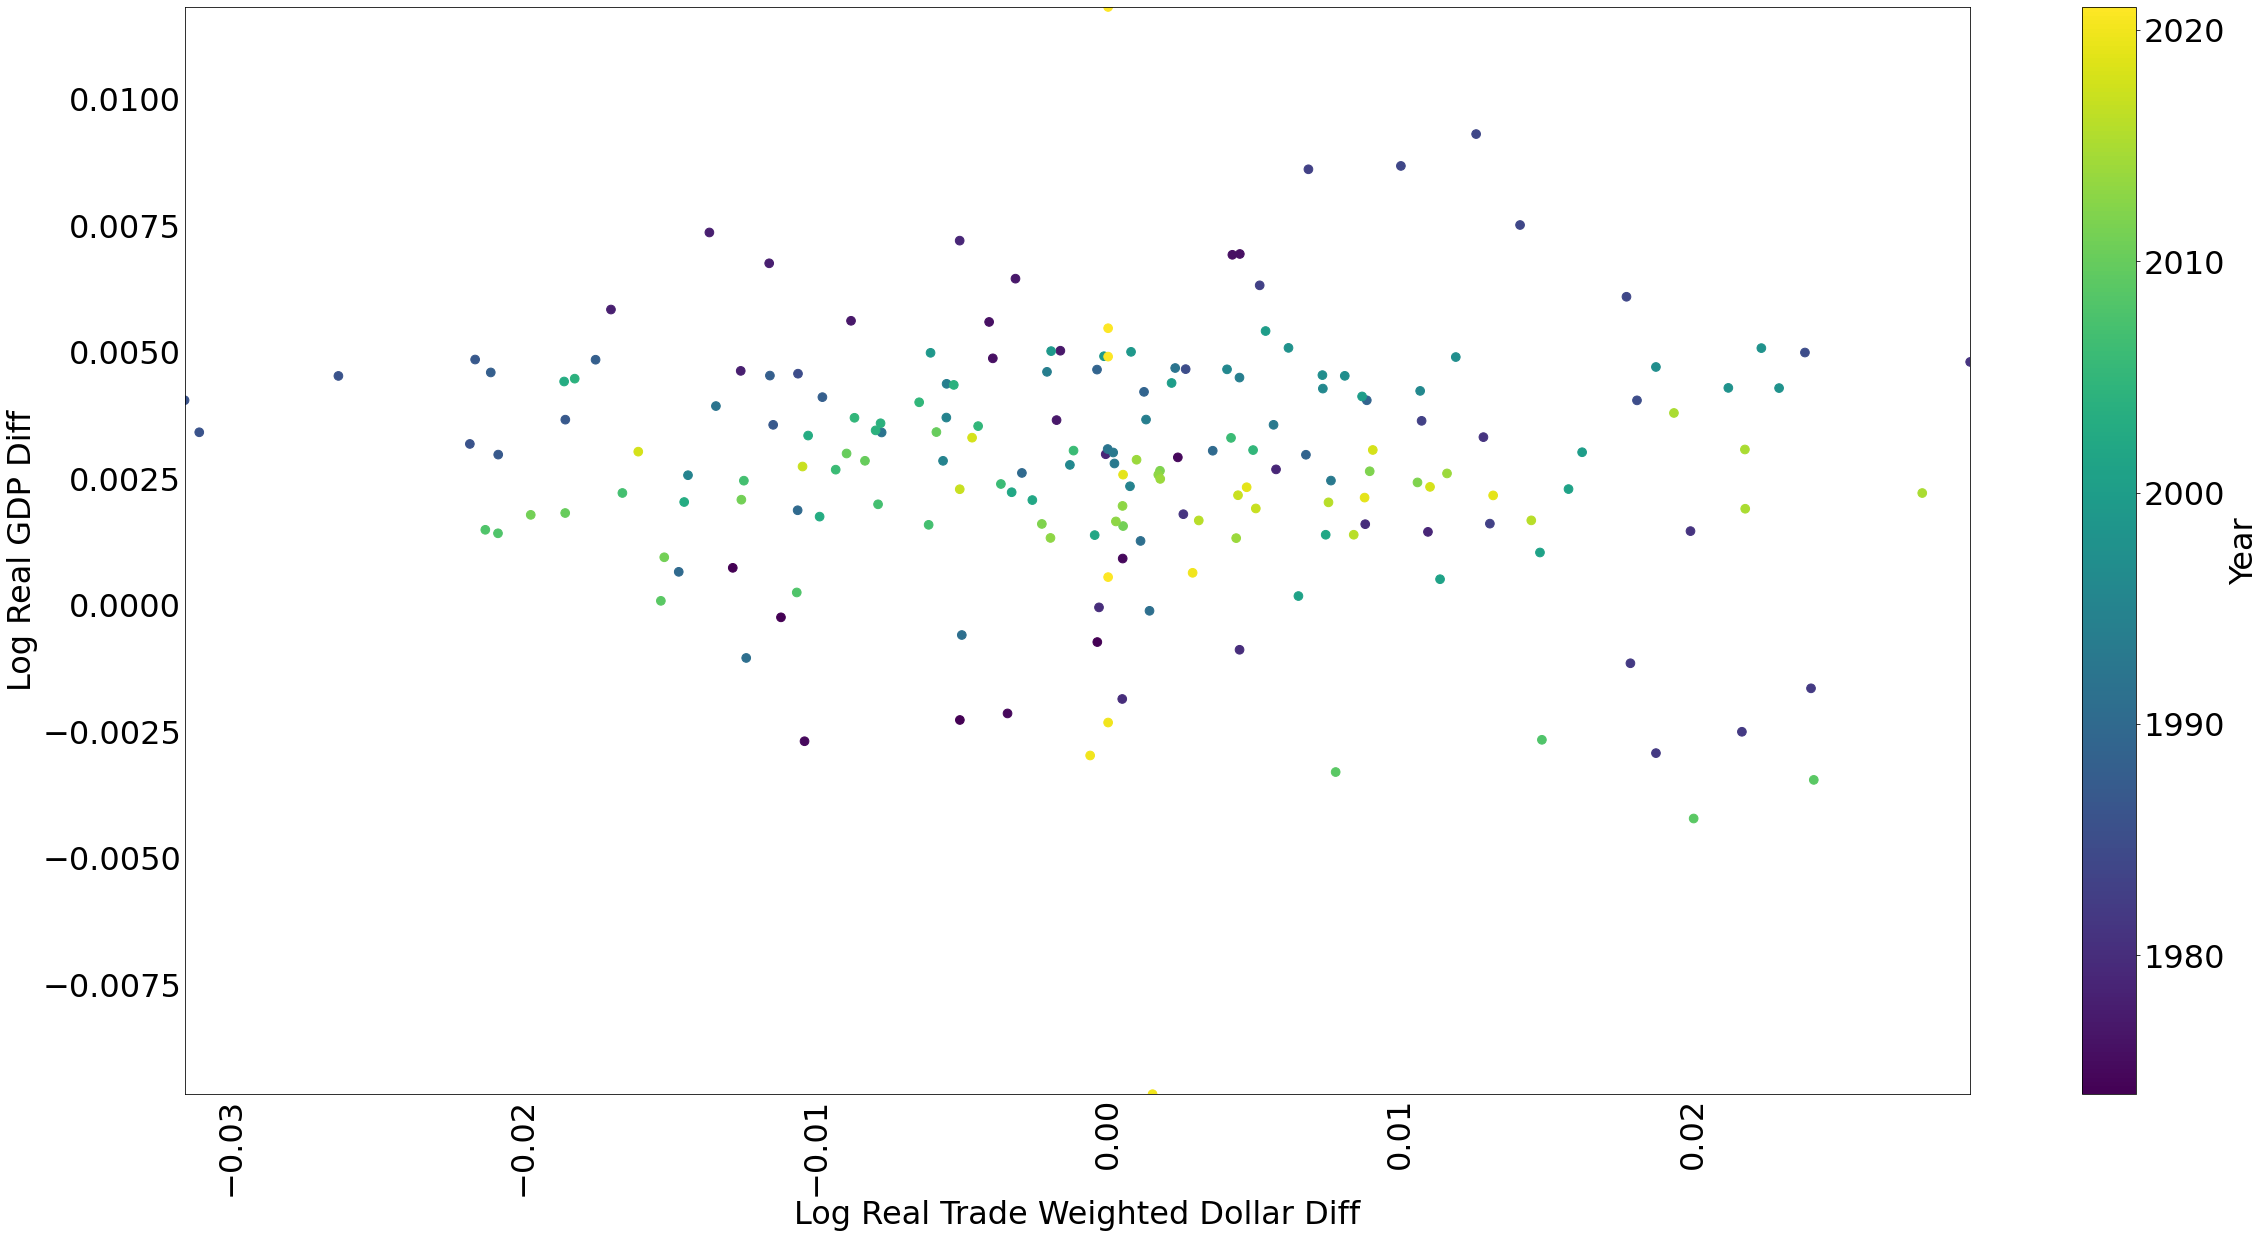

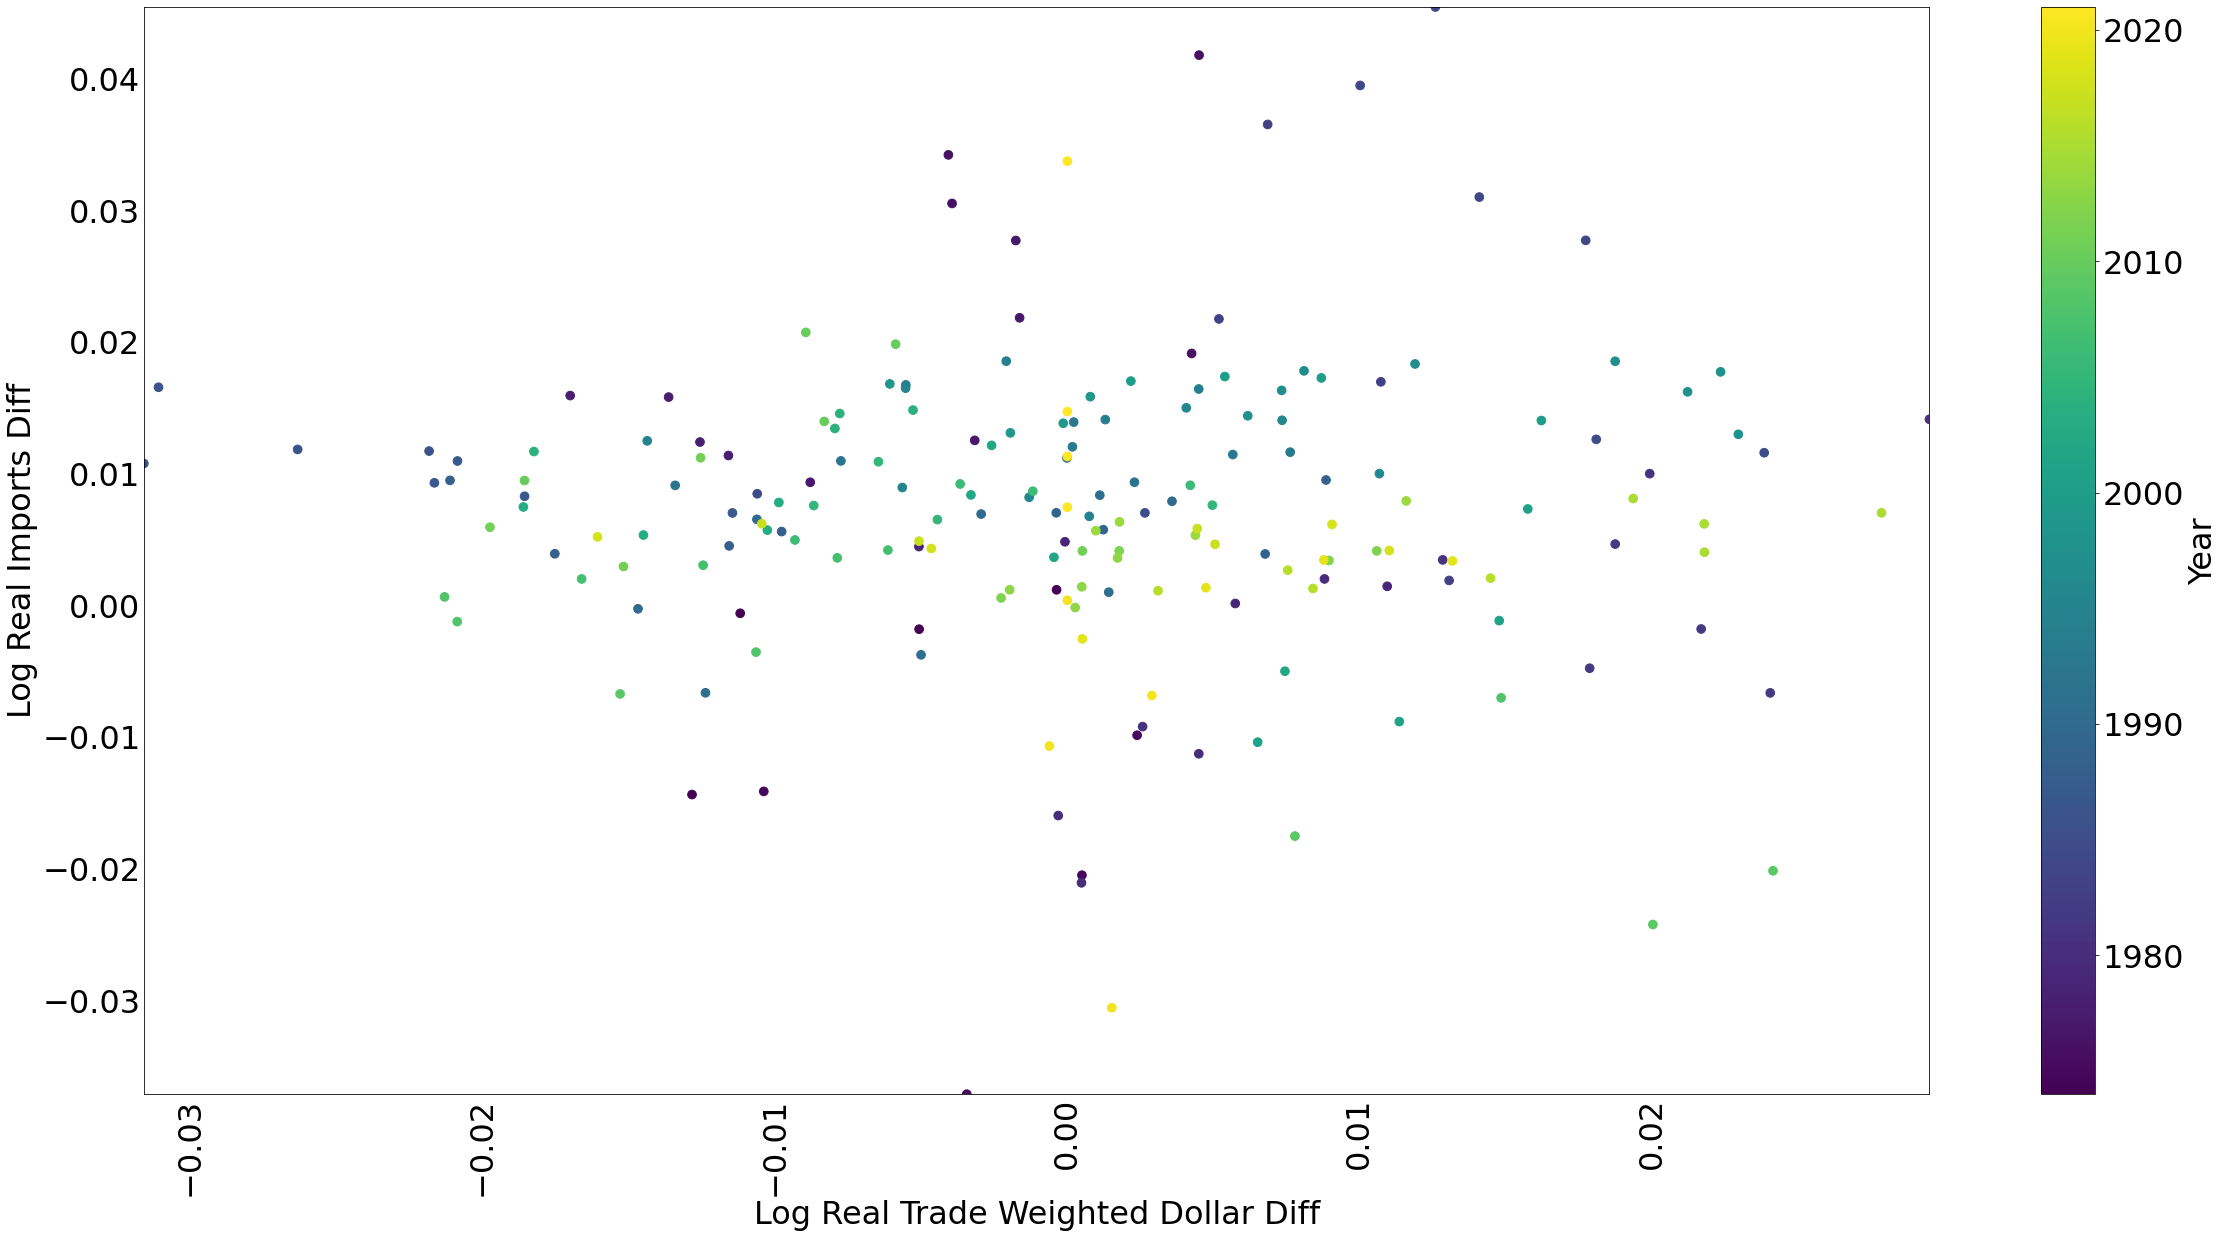

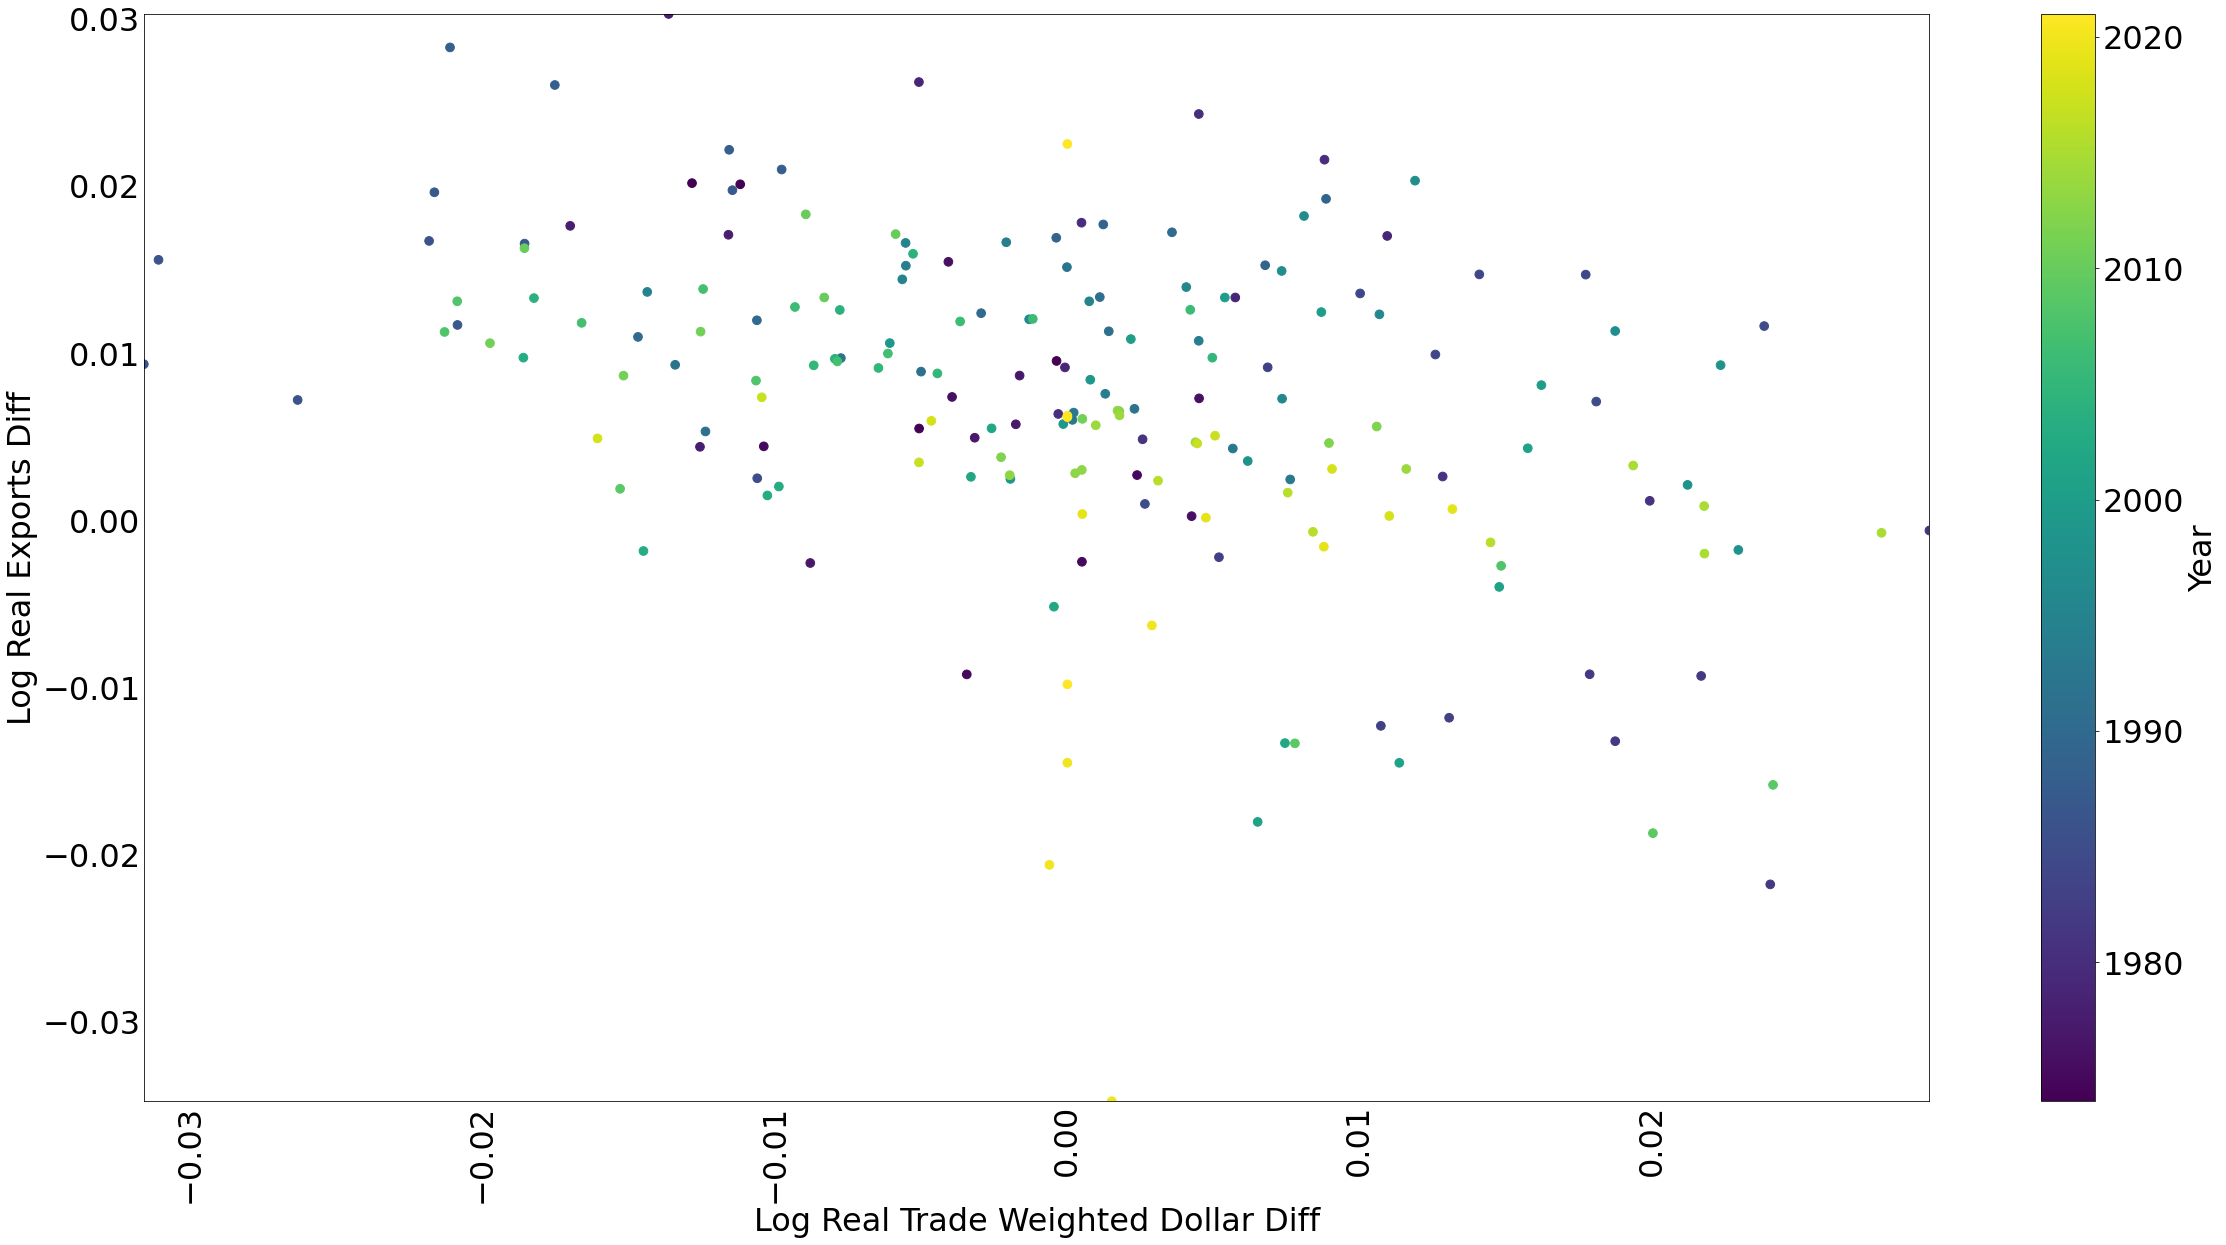

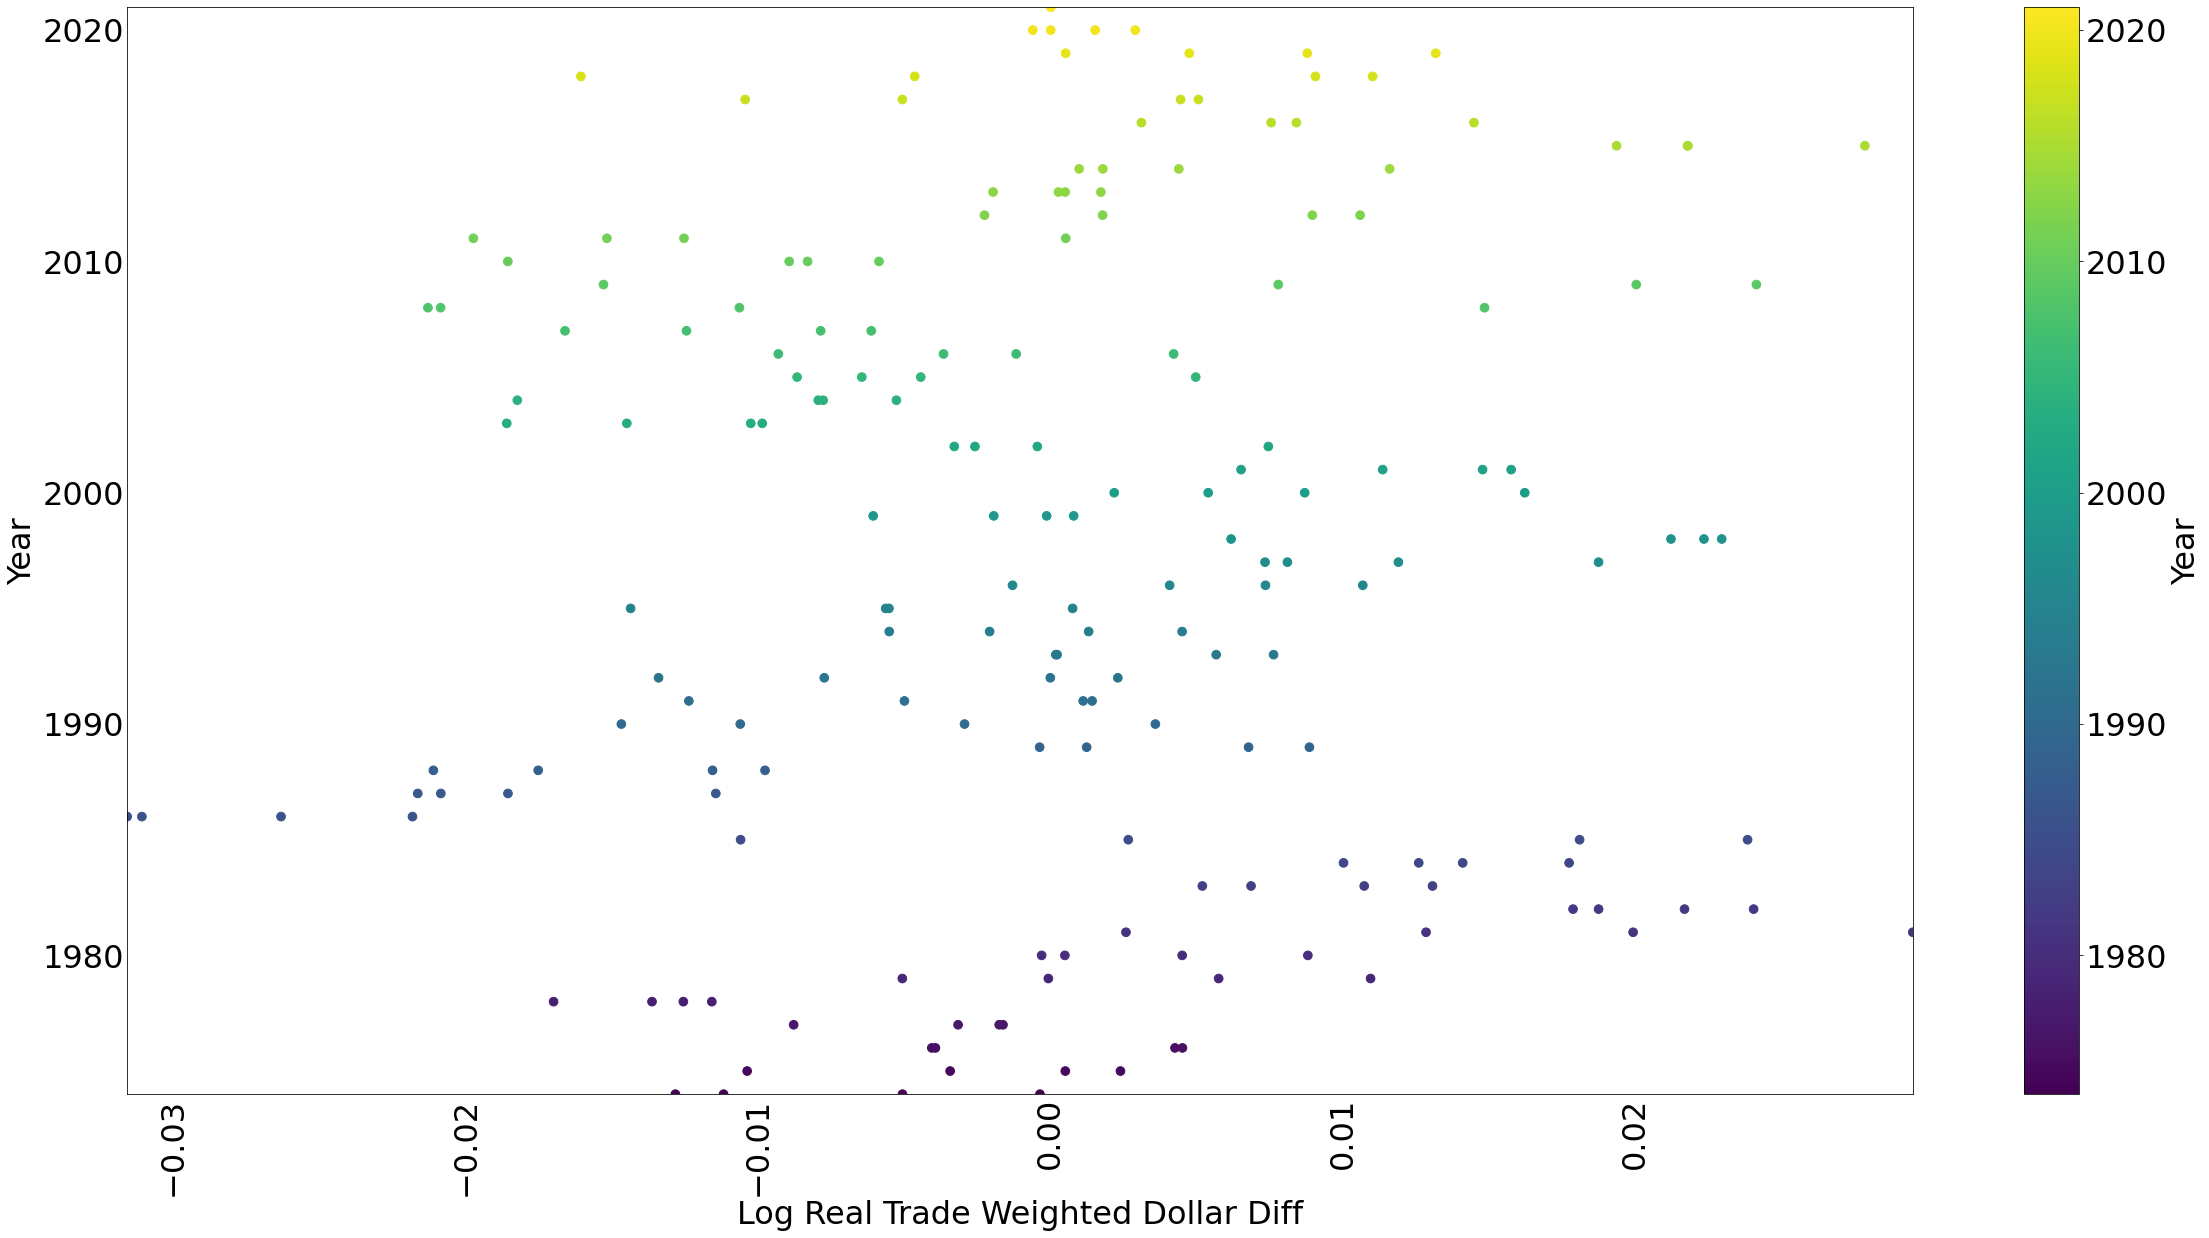

In [19]:
from datlib.plots import *
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_lines(data[["Log Real Imports Diff", "Log Real Exports Diff"]])
plot_scatter(data[["Log Real GDP Diff", "Log Real Imports Diff", "Log Real Exports Diff", "Log Real Trade Weighted Dollar Diff"]])

5.	Generate scatter plot of the log differenced values of Imports, Exports, and Real GDP (i.e., define one variable for the x-axis and the other for the y-axis). 

6.	Are real imports and real exports positively or negatively correlated?

7.	Create a scatter plot of log differenced values for Net Real Exports and the Real Trade Weighted U.S. Dollar Index.

9. Do changes in the level of imports or the level of exports appearto be impacted by changes in the value of the dollar?

9.	Which do you think the data indicates is a more significant driver of the level of imports: real GDP or the value of the dollar as reflected by the Real Trade Weighted U.S. Dollar Index? Defend your answer.